# About the Dataset

The original CORD-19 is a resource of over 1,000,000 scholarly articles, including over 400,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses.

In our project, the dataset is sampled from the CORD-19 with size ~10,000 to reduce computation burden.

In [1]:
import os
import subprocess


# shared link: https://drive.google.com/drive/folders/1Td_ZTUVrsKeftDE5Zll7252YLJdWiNTk?usp=share_link
# you can download the data via the shared link, and skip Step 0 and Step 1 if you want to run the code in your local machine


# # Step 0: add the shared folder to your google drive. e.g., /content/drive/MyDrive/CORD_19

# # Step 1: Mount Google Drive
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)


# !echo $PWD

# !ls /content/drive/MyDrive/CORD_19/

# # Step 2: unzip json files
# data_root = os.path.join(os.getcwd(),"CORD_19")
# subset_dir = os.path.join(data_root,"CORD_19_subset")

# zip_file_path=os.path.join(data_root,"subset.zip")

# print("zip_file_path:",zip_file_path)
# print("subset_dir:",subset_dir)

# # Check if the destination directory exists
# if not os.path.exists(subset_dir):
#     # Unzip the file
#     print("OS FALSE? ",os.system("mkdir \"{}/\"".format(subset_dir)))
#     cmd = "unzip \"{}\" -d \"{}\"".format(zip_file_path, subset_dir)
#     print("CMD: ",cmd)
#     proc = subprocess.Popen(cmd, shell=True)
# else:
#     print(f"Directory {subset_dir} already exists. Skipping extraction.")

In [2]:
# import packages

import os
import json
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


# Data Load & Pre-processing

In [3]:
import time
STARTTIME=time.time()

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load Meta data from meta_10k.csv
data_root = os.path.join(os.getcwd(),"CORD_19")
metadata_path = os.path.join(data_root, 'meta_10k.csv')

meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str,
    'doi': str
})

print(len(meta_df))
meta_df.head()

9022


Unnamed: 0  cord_uid                                       sha source_x  \
0          44  m71xkuo9  c6bf372c094f035a514975c35a7f9c094abbe493      PMC   
1          96  hqc7u9w3  c65f0939cf35a0f04bf93bd6e8f771b8521563a5      PMC   
2         217  jzwcy7dr  a009c8efa4c5f13a5e604608d4e33e1dac078044      PMC   
3         255  02opdk0m  b411e12b20d883ef2ee5ca19d48eff9fccedf05f      PMC   
4         342  094d0rn6  513d5ea4db4eb8e94c14c46b018c6041d78119cf      PMC   

                                               title  \
0  Sequence specific visual detection of LAMP rea...   
1  Transmission Parameters of the 2001 Foot and M...   
2  Results From a Hypothesis Generating Case-Cont...   
3  CVTree update: a newly designed phylogenetic s...   
4  IPS-1 Is Essential for the Control of West Nil...   

                            doi       pmcid pubmed_id    license  \
0         10.1186/1472-6750-6-3  PMC1373654  16401354      cc-by   
1  10.1371/journal.pone.0000502  PMC1876810  17551582      cc-by   
2         10.1093/schbul/sbm139  PMC2632504  18156638  bronze-oa   
3            10.1093/nar/gkp278  PMC2703908  19398429   cc-by-nc   
4  10.1371/journal.ppat.1000757  PMC2816698  20140199      cc-by   

                                            abstract publish_time  \
0  BACKGROUND: Development of a practical gene po...   2006-01-10   
1  Despite intensive ongoing research, key aspect...   2007-06-06   
2  Background: Herpes family viruses can cause ce...   2008-08-20   
3  The CVTree web server (http://tlife.fudan.edu....   2009-07-01   
4  The innate immune response is essential for co...   2010-02-05   

                                             authors                 journal  \
0  Mori, Yasuyoshi; Hirano, Tsuyoshi; Notomi, Tsu...          BMC Biotechnol   
1                Chis Ster, Irina; Ferguson, Neil M.                PLoS One   
2  Niebuhr, David W.; Millikan, Amy M.; Yolken, R...  Schizophrenia Bulletin   
3                              Xu, Zhao; Hao, Bailin       Nucleic Acids Res   
4  Suthar, Mehul S.; Ma, Daphne Y.; Thomas, Sunil...             PLoS Pathog   

   mag_id  who_covidence_id arxiv_id  \
0     NaN               NaN      NaN   
1     NaN               NaN      NaN   
2     NaN               NaN      NaN   
3     NaN               NaN      NaN   
4     NaN               NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/c6bf372c094f035a51497...   
1  document_parses/pdf_json/c65f0939cf35a0f04bf93...   
2  document_parses/pdf_json/a009c8efa4c5f13a5e604...   
3  document_parses/pdf_json/b411e12b20d883ef2ee5c...   
4  document_parses/pdf_json/513d5ea4db4eb8e94c14c...   

                                 pmc_json_files  \
0  document_parses/pmc_json/PMC1373654.xml.json   
1  document_parses/pmc_json/PMC1876810.xml.json   
2  document_parses/pmc_json/PMC2632504.xml.json   
3  document_parses/pmc_json/PMC2703908.xml.json   
4  document_parses/pmc_json/PMC2816698.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...    NaN  
2  https://academic.oup.com/schizophreniabulletin...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...    NaN

In [6]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9022 entries, 0 to 9021
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9022 non-null   int64  
 1   cord_uid          9022 non-null   object 
 2   sha               9022 non-null   object 
 3   source_x          9022 non-null   object 
 4   title             9022 non-null   object 
 5   doi               8599 non-null   object 
 6   pmcid             7942 non-null   object 
 7   pubmed_id         6986 non-null   object 
 8   license           9022 non-null   object 
 9   abstract          8289 non-null   object 
 10  publish_time      9022 non-null   object 
 11  authors           9009 non-null   object 
 12  journal           8095 non-null   object 
 13  mag_id            0 non-null      float64
 14  who_covidence_id  0 non-null      float64
 15  arxiv_id          480 non-null    object 
 16  pdf_json_files    9022 non-null   object 


In [7]:
def glob_files(path, f_type=".json"):
    dst = []
    for root, _, files in os.walk(path):
        for f in files:
            if f.endswith(f_type):
                dst.append(os.path.join(root, f))
    return dst

# glob json files
subset_dir = os.path.join(data_root,"CORD_19_subset")
json_dir = os.path.join(subset_dir, "subset\document_parses\pdf_json")
print(json_dir)
json_files = glob_files(json_dir, ".json")

print("total json files:", len(json_files))

C:\Users\Administrator\Ipynb project\big data computing\CORD_19\CORD_19_subset\subset\document_parses\pdf_json
total json files: 12000


In [8]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)

            self.title = content['metadata']['title']

            #dict_keys(['paper_id', 'metadata', 'abstract', 'body_text',
            #'bib_entries', 'ref_entries', 'back_matter'])


    def __repr__(self):
        return f"{self.paper_id}: {self.title } : {self.abstract[:200]}... {self.body_text[:200]}..."


first_row = FileReader(json_files[0])
print(first_row)

00046b27022615aaec3782ea69c56da3d2fd2ffa: Vaccine design and delivery approaches for COVID-19 : ... process of vaccine design has been revolutionized by reverse vaccinology, which focuses on finding potential vaccine candidates through bioinformatics analysis of the protein-coding genome (proteome) ...


In [9]:
from tqdm import tqdm

def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data


dict_ = {'paper_id': [], 'doi':[], 'abstract': [], 'body_text': [],
         'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}


for idx, entry in tqdm(enumerate(json_files), total=len(json_files)):
    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # invalid paper format, skip

    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue
    if len(content.body_text) == 0:
        continue
    dict_['abstract'].append(content.abstract)
    dict_['paper_id'].append(content.paper_id)
    dict_['body_text'].append(content.body_text)
    # also create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0:
        # no abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # abstract provided is too long for plot, take first 300 words append with ...
        info = content.abstract.split(' ')[:100]
        summary = get_breaks(' '.join(info), 40)
        dict_['abstract_summary'].append(summary + "...")
    else:
        # abstract is short enough
        summary = get_breaks(content.abstract, 40)
        dict_['abstract_summary'].append(summary)

    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]

    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # more than 2 authors, may be problem when plotting, so take first 2 append with ...
            dict_['authors'].append(get_breaks('. '.join(authors), 40))
        else:
            # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null valie
        dict_['authors'].append(meta_data['authors'].values[0])

    # add the title information, add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])

    # add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])

    # add doi
    dict_['doi'].append(meta_data['doi'].values[0])


df_covid = pd.DataFrame(dict_, columns=['paper_id', 'doi', 'abstract', 'body_text',
                                        'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

100%|████████████████████████████████████████████████████████████████████████████| 12000/12000 [04:35<00:00, 43.60it/s]


paper_id                            doi  \
0  0015cecc2298c3bdb9bda0e0b84b38ebdcca716f     10.1007/s40744-022-00425-0   
1  0016a5c32e9cea6002cf6f352ecdb5231c7e3194  10.30699/ijp.2020.127312.2387   
2  0020e5c796f50e927b96ff0b7ea375b4745261a3     10.1186/s12887-020-02112-x   
3  00234390dbc45e3370ac8f80cbd93cec3777ca92     10.1016/j.ajur.2021.03.006   
4  0025fd87cfaf7953079b618771218b8de6893928      10.3389/fcell.2021.748905   

                                            abstract  \
0  Coronavirus disease 2019 caused by the severe ...   
1                                                      
2  Background: One major limitation for less inva...   
3  Objective: To identify the impact of COVID-19 ...   
4                                                      

                                           body_text  \
0  Systemic inflammation is the hallmark of coron...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Respiratory Distress Syndrome (RDS) affects 85...   
3  The World Health Organization (WHO) has announ...   
4  The concept of specialized "membrane microdoma...   

                                             authors  \
0   Drosos, Alexandros A..  Pelechas,<br>Elefther...   
1   Abdollahi, Alireza.  shakoori, Abbas. <br>Kho...   
2   Chevallier, Marie.  Durrmeyer, Xavier.  Ego,<...   
3   Raheem Ali, Abdel.  Ghazwani, Yahya.  Alowida...   
4   Garofalo, Tina.  Misasi, Roberta.  Preta,<br>...   

                                               title              journal  \
0   Colchicine Against SARS-CoV-2 Infection:<br>W...       Rheumatol Ther   
1   Comparison of Patient-collected and Lab<br>Te...        Iran J Pathol   
2   Propofol versus placebo (with rescue with<br>...          BMC Pediatr   
3   Impact of COVID-19 on endourology surgical<br...         Asian J Urol   
4   Editorial: Targeting Lipid Rafts as a Strateg...  Front Cell Dev Biol   

                                    abstract_summary  
0   Coronavirus disease 2019 caused by the severe...  
1                                      Not provided.  
2   Background: One major limitation for less<br>...  
3   Objective: To identify the impact of COVID-19...  
4                                      Not provided.

In [10]:
df_covid['publish_time']=meta_df['publish_time'].copy()

In [11]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9022 entries, 0 to 9021
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          9022 non-null   object
 1   doi               8599 non-null   object
 2   abstract          9022 non-null   object
 3   body_text         9022 non-null   object
 4   authors           9009 non-null   object
 5   title             9022 non-null   object
 6   journal           8095 non-null   object
 7   abstract_summary  9022 non-null   object
 8   publish_time      9022 non-null   object
dtypes: object(9)
memory usage: 634.5+ KB


In [12]:
df = df_covid
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8070 entries, 0 to 9021
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          8070 non-null   object
 1   doi               8070 non-null   object
 2   abstract          8070 non-null   object
 3   body_text         8070 non-null   object
 4   authors           8070 non-null   object
 5   title             8070 non-null   object
 6   journal           8070 non-null   object
 7   abstract_summary  8070 non-null   object
 8   publish_time      8070 non-null   object
dtypes: object(9)
memory usage: 630.5+ KB


In [13]:
!pip install langdetect

In [14]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['body_text'].split(" ")

    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:

            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass

    # get the language
    languages.append(lang)

100%|█████████████████████████████████████████████████████████████████████████████| 8070/8070 [00:49<00:00, 164.00it/s]


In [15]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)

print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 8070

{'de': 20, 'en': 8028, 'es': 13, 'fr': 6, 'id': 1, 'nl': 2}


In [16]:
df['language'] = languages
df = df[df['language'] == 'en']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 9021
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          8028 non-null   object
 1   doi               8028 non-null   object
 2   abstract          8028 non-null   object
 3   body_text         8028 non-null   object
 4   authors           8028 non-null   object
 5   title             8028 non-null   object
 6   journal           8028 non-null   object
 7   abstract_summary  8028 non-null   object
 8   publish_time      8028 non-null   object
 9   language          8028 non-null   object
dtypes: object(10)
memory usage: 689.9+ KB


# Histogram of year / journal

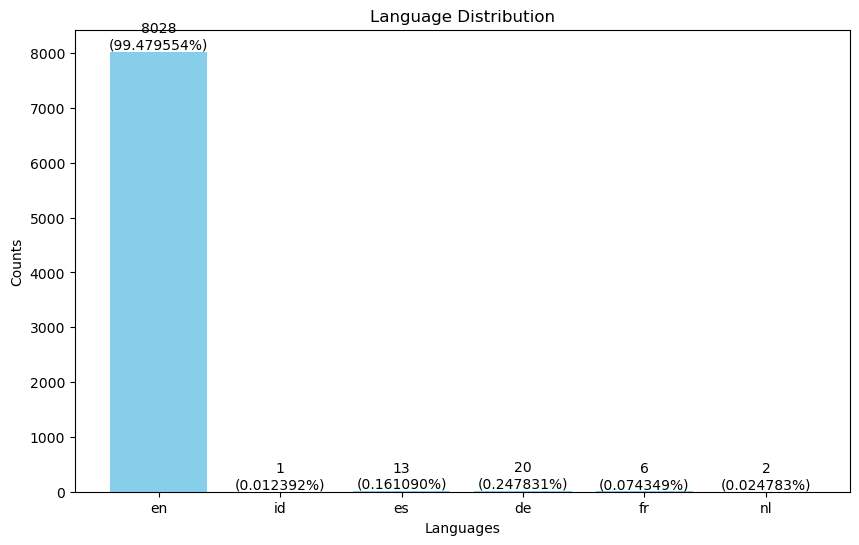

In [17]:
#Calculate the total count
total_count=sum(languages_dict.values())
# Extract languages and their corresponding counts
languages =list(languages_dict.keys())
counts =list(languages_dict.values())
# Calculate frequencies
frequencies =[count /total_count for count in counts]
# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(languages, counts, color='skyblue')
# Add title and labels
plt.title('Language Distribution')
plt.xlabel('Languages')
plt.ylabel('Counts')
# Display count and frequency labels on the bars
for bar, count, freq in zip(bars, counts, frequencies):
    height = bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2,height + 50, f'{count}\n({freq:2%})', ha='center')
# Show the bar chart
plt.show()



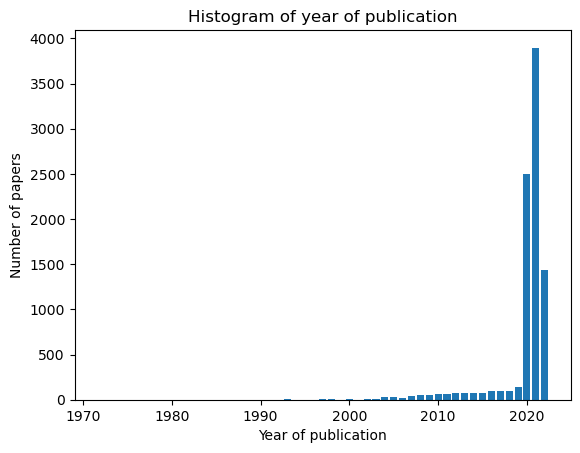

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

meta_df['publish_time_yr'] = pd.to_datetime(meta_df['publish_time'], errors='coerce').dt.year

# Calculate the number of papers per year
paper_count = meta_df['publish_time_yr'].value_counts().sort_index()

# Plotting bar charts
plt.bar(paper_count.index, paper_count.values)

# Setting the chart title and axis labels
plt.title('Histogram of year of publication')
plt.xlabel('Year of publication')
plt.ylabel('Number of papers')

# Show charts
plt.show()

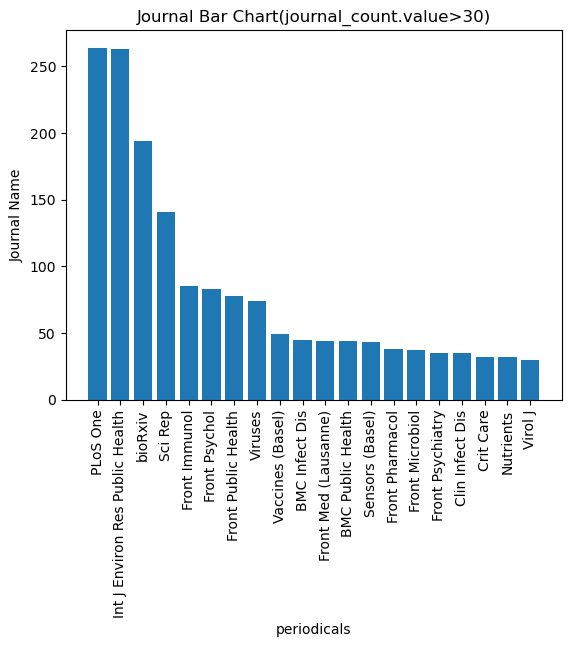

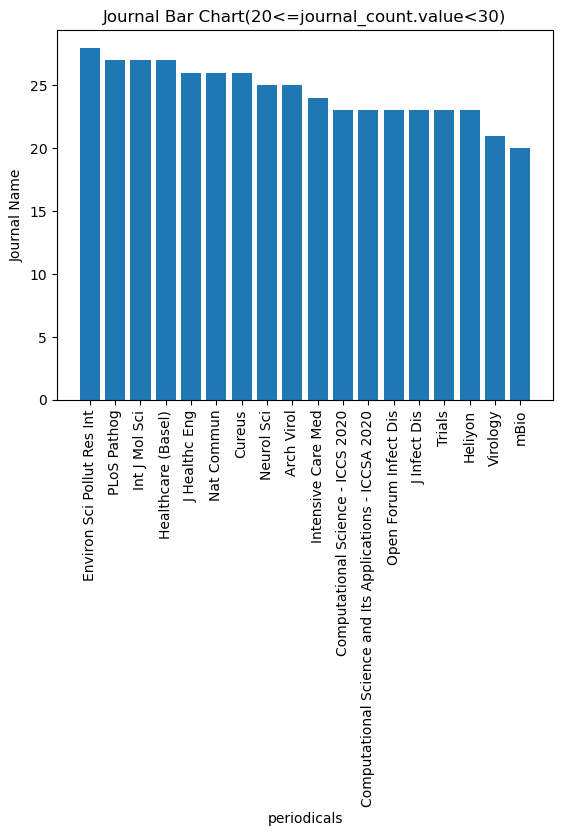

In [19]:
import matplotlib.pyplot as plt

# Calculate the number of papers per journal
journal_count = meta_df['journal'].value_counts()

journal_count0 = journal_count[journal_count.values>=30]
# Plotting bar charts
plt.bar(journal_count0.index, journal_count0.values)
# Setting the chart title and axis labels
plt.title('Journal Bar Chart(journal_count.value>30)')
plt.xlabel('periodicals')
plt.ylabel('Journal Name')
# In order to avoid overlapping horizontal coordinate text, adjustments can be made using the following code
plt.xticks(rotation=90)
# Show charts
plt.show()


journal_count0 = journal_count[journal_count.values<30]
journal_count0 = journal_count0[journal_count0.values>=20]
# Plotting bar charts
plt.bar(journal_count0.index, journal_count0.values)
# Setting the chart title and axis labels
plt.title('Journal Bar Chart(20<=journal_count.value<30)')
plt.xlabel('periodicals')
plt.ylabel('Journal Name')

# In order to avoid overlapping horizontal coordinate text, adjustments can be made using the following code
plt.xticks(rotation=90)

# Show charts
plt.show()

In [20]:
# Histogram cancellation variable:

total_count=languages=counts=frequencies=None
bars=paper_count=journal_count=journal_count0=None

# Map-Reduce 

## Map-Reduce with stop list

In [21]:
data = pd.DataFrame(dict_, columns=['body_text',
                                        'title','paper_id' ])
def clean_word(data):
    return re.sub(r'[^\w\s]','',data).lower()

from collections import Counter    
import re     

def find_top_words(data_pd):
    cnt = Counter()
    for col in data_pd.columns: #columns=['abstract', 'body_text','authors', 'title', 'journal']
        material_list = data_pd[col]
        print("COL",col)
        for text in material_list:  #paper 0-9021 each column
            try:
                tokens_in_text = text.split()
                tokens_in_text = map(clean_word, tokens_in_text)
                cnt.update(tokens_in_text)
            except AttributeError: # AttributeError: 'float' object has no attribtuion 'spilt'
                return cnt.most_common(50)

In [22]:
%time find_top_words(data)

COL body_text
COL title
COL paper_id
CPU times: total: 1min 4s
Wall time: 1min 4s


In [23]:
import nltk
import pandas as pd
nltk.download('stopwords')# Create a set of stop words 
from nltk.corpus import stopwords
 
stop_words = nltk.corpus.stopwords.words('english')
# entend()function is used to add custom stopwords 
stop_list = ["1","2","3","4","5","6","7","8","9","et","al","also","used","using","one","however","n","may","","two","different","p","10",'however',"figure","table","could","fig",]
stop_words.extend(stop_list)
print(stop_words)

data = pd.DataFrame(dict_, columns=[ 'abstract', 'body_text', 'title', 'journal'])
def clean_word(data):
    return re.sub(r'[^\w\s]','',data).lower()

from collections import Counter    
import re     

def find_top_words(data_pd):
    cnt = Counter()
    for col in data_pd.columns: #columns=['abstract', 'body_text','authors', 'title', 'journal']
        material_list = data_pd[col]
        print("COL",col)
        for text in material_list:  #paper 0-9021 each column
            try:
                tokens_in_text = text.split()
                tokens_in_text = [w for w in tokens_in_text if not w.lower() in stop_words]
                tokens_in_text = map(clean_word, tokens_in_text)
                cnt.update(tokens_in_text)
            except AttributeError: # AttributeError: 'float' object has no attribtuion 'spilt'
                return cnt.most_common(50)
        

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from collections import Counter
import re
import concurrent.futures

# Function to clean a word
def clean_word(word):
    return re.sub(r'[^\w\s]', '', word).lower()

# Function to perform the Word Count MapReduce
def word_count_map(text, stop_words):
    word_counts = Counter()
    words = text.split()
    for word in words:
        cleaned_word = clean_word(word)
        if cleaned_word and cleaned_word not in stop_words:
            word_counts[cleaned_word] += 1
    return word_counts

# Function to combine word counts from different mappers
def combine_word_counts(results):
    combined_word_counts = Counter()
    for word_count in results:
        combined_word_counts.update(word_count)
    return combined_word_counts

# Define the stop word list
import nltk
nltk.download('stopwords')# Create a set of stop words 
from nltk.corpus import stopwords
 
stop_words = nltk.corpus.stopwords.words('english')
# entend()function is used to add custom stopwords 
stop_list = ["1","2","3","4","5","6","7","8","9","et","al","also","used","using","one","however","n","may","","two","different","p","10",'however',"figure","table","could","fig",]
stop_words.extend(stop_list)

# Call the parallel Word Count MapReduce function
word_counts = Counter()
with concurrent.futures.ThreadPoolExecutor(max_workers=100) as executor:
    # Map phase
    futures = [executor.submit(word_count_map, text, stop_words)
               for col in data.columns for text in data[col] if isinstance(text, str)]

    # Reduce phase
    results = [future.result() for future in concurrent.futures.as_completed(futures)]
    word_counts = combine_word_counts(results)

# Get the top 50 words
top_50_words = word_counts.most_common(50)

# Print the top 50 most common words
for word, count in top_50_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


patients: 107691
covid19: 103187
data: 90653
study: 90481
health: 59330
cells: 57356
time: 51995
model: 49402
results: 48613
infection: 48608
studies: 47975
2020: 47207
disease: 44051
number: 43710
use: 43327
analysis: 42729
virus: 38895
sarscov2: 38859
first: 38047
pandemic: 37294
reported: 36480
research: 35908
risk: 35287
cases: 35169
clinical: 33877
high: 33790
based: 33627
group: 33199
found: 32609
higher: 32591
viral: 31752
information: 31688
protein: 31461
treatment: 31265
social: 31026
due: 30841
significant: 30802
cell: 30624
system: 30589
including: 30552
among: 30357
participants: 29950
compared: 29057
associated: 28876
new: 28755
well: 28186
levels: 27812
control: 27729
care: 27437
shown: 26858


## Map-Reduce of Paper Id with respective occurances

In [25]:
from collections import Counter
import re
import concurrent.futures
import pandas as pd

# Function to clean a word
def clean_word(word):
    return re.sub(r'[^\w\s]', '', word).lower()

# Function to perform the Word Count MapReduce
def word_count_map(text, stop_words, queried_words, paper_id):
    word_counts = Counter()
    words = text.split()
    for word in words:
        cleaned_word = clean_word(word)
        if cleaned_word and cleaned_word not in stop_words and cleaned_word in queried_words:
            word_counts[cleaned_word] += 1
    return paper_id, word_counts

# Function to combine word counts from different mappers
def combine_word_counts(results):
    combined_word_counts = Counter()
    for _, word_count in results:
        combined_word_counts.update(word_count)
    return combined_word_counts

# Define the stop word list
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = nltk.corpus.stopwords.words('english')
stop_list = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "et", "al", "also", "used", "using", "one", "however", "n", "may", "", "two", "different", "p", "10", "however", "figure", "table", "could", "fig"]
stop_words.extend(stop_list)

# Define the DataFrame
data = pd.DataFrame(dict_, columns=['abstract', 'body_text', 'authors', 'title', 'journal', 'paper_id'])

# Get the queried words from user input
# queried_words = input("Enter the queried words (separated by spaces): ").split()
# e.g
queried_words = "patients covid19 study health results infection".split()

# Call the parallel Word Count MapReduce function
word_counts = Counter()
index = {}
with concurrent.futures.ThreadPoolExecutor(max_workers=100) as executor:
    # Map phase
    futures = []
    for col in data.columns:
        for i, text in enumerate(data[col]):
            if isinstance(text, str):
                paper_id = f"{data.at[i, 'paper_id']}_{data.at[i, 'title']}"
                futures.append(executor.submit(word_count_map, text, stop_words, queried_words, paper_id))

    # Reduce phase
    results = [future.result() for future in concurrent.futures.as_completed(futures)]
    word_counts = combine_word_counts(results)

    # Build index
    for paper_id, word_count in results:
        for word, count in word_count.items():
            if word in index:
                index[word].append((paper_id, count))
            else:
                index[word] = [(paper_id, count)]

# Generate the summary of paper IDs with summed occurrence
summary = {}
for word in queried_words:
    if word in index:
        summary[word] = {
            'Total Occurrences': sum(count for _, count in index[word]),
            'Paper IDs': [(paper_id, count) for paper_id, count in index[word]]
        }
    elif word in stop_words:
        summary[word] = {
            'Total Occurrences': 0,
            'Paper IDs': "In the stop list"
        }
    else:
        summary[word] = {
            'Total Occurrences': 0,
            'Paper IDs': "Not occurred in the dataset"
        }

# Print the summary
for word, info in summary.items():
    print(f"The Queried word is {word}:")
    print(f"  Total Occurrences: {info['Total Occurrences']}")
    if isinstance(info['Paper IDs'], str):
        print(f"  {info['Paper IDs']}")
    else:
        print(f"                   Paper IDs:                           Topics")
        for paper_id, count in info['Paper IDs']:
            print(f"    {paper_id} (Occurrences: {count})")
    print()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




    b2d9979914c7b3019630d9b3aff743169b38fab3_ Rapid sequence induction: where did the<br>consensus go? (Occurrences: 1)
    bf9e631a7ed901ba84711ef3d2b59e90c5ef7727_ Type-I interferon signatures in SARS-CoV-2<br>infected Huh7 cells (Occurrences: 50)
    b2d985636a108a0d4431f356dd809c0ea18623c6_ Cytokine storm syndrome in coronavirus<br>disease 2019: A narrative review (Occurrences: 11)
    5f18de7beb0fc880e93a093fae4dc6a77a6fdddb_ Isolation and molecular characterization of<br>Sul/01/09 avian infectious bronchitis virus, indicates<br>the emergence of a new genotype in the Middle East (Occurrences: 3)
    0095d90ff0cd5089f0e75c62ce38c675daf8d813_ Human T-cell lymphotropic virus type 1<br>transmission dynamics in rural villages in the Democratic<br>Republic of the Congo with high nonhuman primate<br>exposure (Occurrences: 25)
    975a5f0a1c927d09167f7b8d2d56d52d8b9acefb_ The Emerging Application of Itaconate:<br>Promising Molecular Targets and Therapeutic<br>Opportunities (Occurrences: 

In [26]:
# MapReduce cancellation variable:

data=stop_words=stop_list=word_counts=None
top_50_words=queried_words=index=summary=None

# Association Analysis

## Data Clean

In [27]:
# !python -m pip install -U pydantic spacy
!pip install spacy==3.7.5
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 325.1 kB/s eta 0:00:40
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 409.6 kB/s eta 0:00:32
     --------------------------------------- 0.1/12.8 MB 508.4 kB/s eta 0:00:26
     --------------------------------------- 0.1/12.8 MB 467.6 kB/s eta 0:00:28
     --------------------------------------- 0.1/12.8 MB 522.9 kB/s eta 0:00:25
     --------------------------------------- 0.2/12.8 MB 482.7 kB/s eta 0:00:27
      -------------------------------------- 0.2/12.8 MB 556.2 kB/s eta 0:00:23
      -------------------------------------- 0.2/12.8 MB 535.8 kB/s eta 0:00:24
      -------------------------------------- 0.2/12.8 MB 528.4 kB/s eta 0:00:24
      -------------------------------------- 0.2/12.8 MB

In [28]:
import spacy
import pandas as pd
import re
from bs4 import BeautifulSoup

In [29]:
# Removal of special characters, punctuation, html label and numbers.
def clean_text(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text(separator=" ")
    cleaned_text = re.sub(r'[^A-Za-z\s]', '', cleaned_text)
    return cleaned_text

# NLP processing functions, including word splitting, stop word removal
def spacy_process_text(text):
    doc = nlp(text)
    # Removal of stop words using list derivation
    result = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha]
    return " ".join(result)

In [30]:
df3_3 = df.copy(deep=True)
nlp = spacy.load('en_core_web_sm')

# defined custom stop words list
my_stop_words = ['doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure',
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.',
    'al.', 'Elsevier', 'PMC', 'CZI', ' ', '\n', '  ', '+', ' \n', '  \n']
for stopword in my_stop_words:
    nlp.vocab[stopword].is_stop = True


tqdm.pandas()
df3_3['cleaned_abstract'] = df3_3['abstract'].progress_apply(clean_text)
df3_3['processed_abstract'] = df3_3['cleaned_abstract'].progress_apply(spacy_process_text)

df3_3['cleaned_text'] = df3_3['body_text'].progress_apply(clean_text)
df3_3['processed_text'] = df3_3['cleaned_text'].progress_apply(spacy_process_text)

print(df3_3[['processed_abstract']])
print(df3_3[['processed_text']])

df3_3.to_csv('output.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████| 8028/8028 [1:42:37<00:00,  1.30it/s]


                                     processed_abstract
0     coronavirus disease cause severe acute respira...
1                                                      
2     background major limitation invasive surfactan...
3     objective identify impact covid endourology su...
4                                                      
...                                                 ...
9016  systematically analyze chemical constituent ci...
9017  selfproduced matrix biofilm consist extracellu...
9018  outbreak coronavirus disease medical staff fac...
9019                                                   
9021  background symptom sign covid coronavirus dise...

[8028 rows x 1 columns]
                                         processed_text
0     systemic inflammation hallmark coronavirus dis...
1     severe acute respiratory syndrome coronavirus ...
2     respiratory distress syndrome rds affect prete...
3     world health organization announce novel coron...
4     concept specializ

## TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

process_text_value = df3_3['processed_text'].values
vectorizer = TfidfVectorizer(max_features=2**12)
X = vectorizer.fit_transform(process_text_value)
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df)

            aa   ab  abdominal   ability      able  abnormal  abnormality  \
0     0.000000  0.0   0.000000  0.000000  0.000000  0.000000      0.01885   
1     0.000000  0.0   0.000000  0.007759  0.015240  0.000000      0.00000   
2     0.000000  0.0   0.000000  0.000000  0.000000  0.000000      0.00000   
3     0.000000  0.0   0.000000  0.021753  0.000000  0.000000      0.00000   
4     0.000000  0.0   0.000000  0.039874  0.000000  0.000000      0.00000   
...        ...  ...        ...       ...       ...       ...          ...   
8023  0.000000  0.0   0.000000  0.000000  0.009572  0.000000      0.00000   
8024  0.011764  0.0   0.000000  0.000000  0.002667  0.000000      0.00000   
8025  0.000000  0.0   0.000000  0.014357  0.000000  0.000000      0.00000   
8026  0.031753  0.0   0.000000  0.014659  0.000000  0.000000      0.00000   
8027  0.000000  0.0   0.194022  0.000000  0.009834  0.035424      0.00921   

      abortion   absence  absent  ...  york     young  youth  zero     zhan

In [32]:
tfidf_threshold = 0.07
transactions = []

for index, row in tqdm(tfidf_df.iterrows(), total=tfidf_df.shape[0], desc="Generating Transactions"):
    transactions.append([vectorizer.get_feature_names_out()[i] for i in range(len(row)) if row[i] >= tfidf_threshold])

Generating Transactions: 100%|█████████████████████████████████████████████████████| 8028/8028 [21:54<00:00,  6.11it/s]


## Applying Fp-growth

In [33]:
!pip install wordcloud
!pip install networkx matplotlib
!pip install pyvis

In [34]:
!pip install mlxtend

In [35]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_fpgrowth = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df_fpgrowth, min_support=0.01, use_colnames=True).sort_values(by='support', ascending=False)

print(frequent_itemsets)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets_cuttoff = frequent_itemsets[frequent_itemsets['length'] > 1]
frequent_itemsets_cuttoff = frequent_itemsets_cuttoff[frequent_itemsets_cuttoff['support'] > 0.03]

print(frequent_itemsets_cuttoff[['itemsets', 'support']])

       support                    itemsets
0     0.312033                   (patient)
1     0.275660                     (covid)
2     0.215371                     (study)
3     0.162930                      (cell)
523   0.157200            (patient, covid)
...        ...                         ...
54    0.010090                    (infant)
497   0.010090                      (loss)
1321  0.010090            (worker, health)
799   0.010090  (patient, surgical, covid)
1076  0.010090    (sequence, phylogenetic)

[1423 rows x 2 columns]
                         itemsets   support
523              (patient, covid)  0.157200
524              (patient, study)  0.100648
525                (study, covid)  0.084953
532            (patient, sarscov)  0.069258
533              (sarscov, covid)  0.067015
833          (patient, infection)  0.065894
543               (protein, cell)  0.060663
756             (pandemic, covid)  0.057798
834            (covid, infection)  0.055680
555            (pat

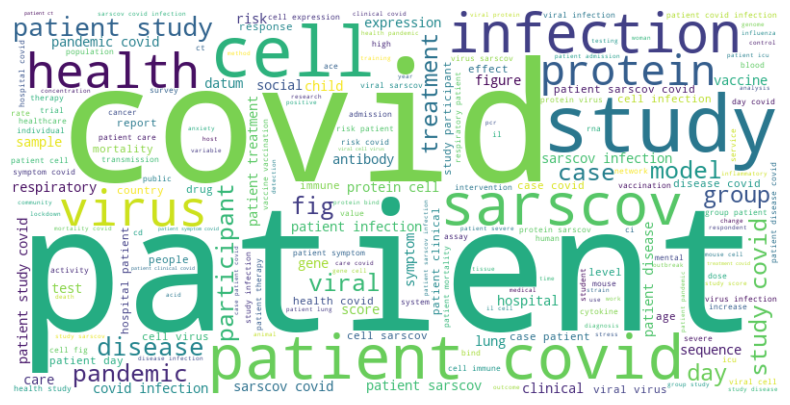

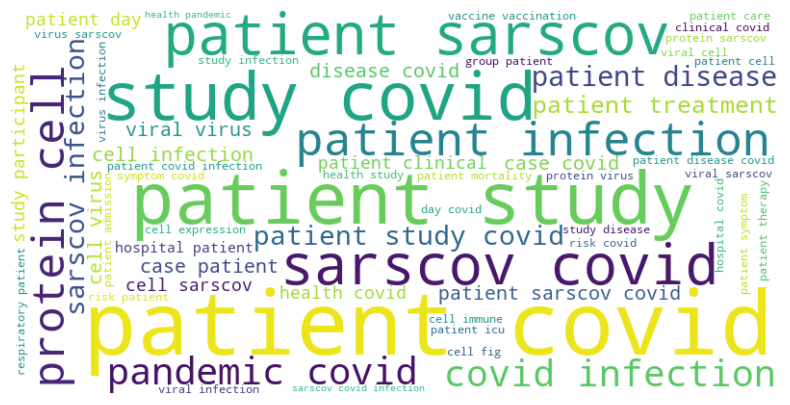

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud_vid_itemsets(itemsets):
  # Create word frequency dictionaries for use in word clouds
  word_freq = {}
  for index, row in itemsets.iterrows():
      # Convert the itemset into a single string, separating the items by spaces
      itemset_str = ' '.join(row['itemsets'])
      # Support as frequency
      word_freq[itemset_str] = row['support']

  wordcloud = WordCloud(width=800, height=400, background_color='white')

  # Generate word clouds based on the support of frequent item sets
  wordcloud.generate_from_frequencies(word_freq)

  # Mapping the word cloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

generate_word_cloud_vid_itemsets(frequent_itemsets)
print("\n")
generate_word_cloud_vid_itemsets(frequent_itemsets_cuttoff)

In [37]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
filtered_rules = rules[(rules['support'] > 0.010) & (rules['confidence'] > 0.5) & (rules['lift'] > 6)]
print(filtered_rules)

             antecedents    consequents  antecedent support  \
29             (vaccine)  (vaccination)            0.064400   
30         (vaccination)      (vaccine)            0.040857   
47                (bind)      (protein)            0.041355   
52         (cell, virus)        (viral)            0.046961   
62              (mental)       (health)            0.034878   
..                   ...            ...                 ...   
571  (dose, vaccination)      (vaccine)            0.010713   
577   (mental, pandemic)       (health)            0.012955   
581                (rbd)      (protein)            0.015944   
592              (tumor)       (cancer)            0.015571   
614       (phylogenetic)     (sequence)            0.011086   

     consequent support   support  confidence       lift  leverage  \
29             0.040857  0.033383    0.518375  12.687550  0.030752   
30             0.064400  0.033383    0.817073  12.687550  0.030752   
47             0.103388  0.027280

In [38]:
from pyvis.network import Network

# Create a pyvis network
nt = Network(height='3000px', width='3000px', directed=True, bgcolor="#ffffff", font_color="black")

# Add nodes and edges
for index, row in filtered_rules.iterrows():
    from_node = ', '.join(list(row['antecedents']))
    to_node = ', '.join(list(row['consequents']))
    support = row['support']
    confidence = row['confidence']

    nt.add_node(from_node, title=from_node, size=30)
    nt.add_node(to_node, title=to_node, size=30)
    nt.add_edge(from_node, to_node, title=f'Support: {support:.3f}, Confidence: {confidence:.3f}')

# Set options for network diagrams (using pyvis presets)
network_options = """
{
  "nodes": {
    "font": {
      "size": 22,
      "strokeWidth": 0,
      "color": "#ffffff"
    },
    "scaling": {
      "min": 10,
      "max": 30
    }
  },
  "edges": {
    "smooth": false,
    "color": {
      "inherit": false,
      "color": "#ffffff"
    },
    "font": {
      "size": 22,
      "align": "top"
    }
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -26,
      "centralGravity": 0.005,
      "springLength": 230,
      "avoidOverlap": 0.0
    },
    "maxVelocity": 146,
    "solver": "forceAtlas2Based",
    "timestep": 0.35,
    "stabilization": {
      "iterations": 150
    }
  },
  "interaction": {
    "dragNodes": true,
    "tooltipDelay": 200,
    "hideEdgesOnDrag": false
  },
  "manipulation": {
    "enabled": true
  }
}
"""

# Save it as an HTML file, but don't open it automatically
nt.save_graph('network.html')


## LDA

In [39]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

def parse_date(date_str):
    # Define different date formats
    date_formats = [
        "%Y-%m-%d",     # ISO 8601 format
        "%d-%m-%Y",     # European DD-MM-YYYY format
        "%m-%d-%Y",     # US MM-DD-YYYY format
        "%Y/%m/%d",     # Alternate separator format
        "%Y",           # Year only
    ]

    # Iterate through all the date formats and try to parse them
    for date_format in date_formats:
        try:
            return pd.to_datetime(datetime.strptime(date_str, date_format))
        except ValueError:
            pass

    # If it gets here, it means there is no match in the format defined above, try another method or return the default value.
    # Check to see if only the year is included
    if re.match(r'^\d{4}$', date_str):
        # Year only, giving default month of June
        return pd.to_datetime(date_str + '-06-01')
    else:
        # If none of them match, return NaT or other customized value
        return pd.NaT

df3_3['uniform_time'] = meta_df['publish_time'].apply(parse_date)


print(df3_3[['publish_time', 'uniform_time']])

invalid_time_df = df3_3[df3_3['uniform_time'].isna()]

print(f"Number of rows with invalid time: {invalid_time_df.shape[0]}")
print(invalid_time_df[['publish_time', 'uniform_time']])


     publish_time uniform_time
0      2006-01-10   2006-01-10
1      2007-06-06   2007-06-06
2      2008-08-20   2008-08-20
3      2009-07-01   2009-07-01
4      2010-02-05   2010-02-05
...           ...          ...
9016   2022-03-14   2022-03-14
9017   2020-08-12   2020-08-12
9018   2020-04-20   2020-04-20
9019   2020-04-29   2020-04-29
9021   2021-02-05   2021-02-05

[8028 rows x 2 columns]
Number of rows with invalid time: 0
Empty DataFrame
Columns: [publish_time, uniform_time]
Index: []


In [40]:
from gensim import corpora, models

df3_3_cutoff_timme = df3_3[(df3_3['uniform_time'] >= '2018-01-01') & (df3_3['uniform_time'] <= '2024-12-31')]


# Create dictionaries and corpora
df3_3_cutoff_timme['processed_text_array'] = df3_3_cutoff_timme['processed_text'].map(lambda text: text.split())
dictionary = corpora.Dictionary(df3_3_cutoff_timme["processed_text_array"])
corpus = [dictionary.doc2bow(text) for text in df3_3_cutoff_timme["processed_text_array"]]

# LDA models
num_topics = 5  # topics selected based on dataset
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=3)


topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.031*"patient" + 0.013*"covid" + 0.012*"study" + 0.007*"disease" + 0.007*"infection"')
(1, '0.027*"cell" + 0.007*"expression" + 0.006*"infection" + 0.006*"mouse" + 0.006*"response"')
(2, '0.009*"virus" + 0.009*"protein" + 0.006*"c" + 0.006*"sarscov" + 0.006*"cell"')
(3, '0.012*"study" + 0.009*"health" + 0.008*"covid" + 0.006*"participant" + 0.005*"pandemic"')
(4, '0.008*"model" + 0.006*"datum" + 0.004*"system" + 0.004*"result" + 0.004*"time"')


In [41]:
df3_3_cutoff_timme['year_month'] = df3_3_cutoff_timme['uniform_time'].dt.to_period('M')

# Get the dominant topic for each document
df3_3_cutoff_timme['topics'] = [lda_model.get_document_topics(bow) for bow in corpus]
df3_3_cutoff_timme['dominant_topic'] = df3_3_cutoff_timme['topics'].apply(lambda topics: max(topics, key=lambda item: item[1])[0])

topic_descriptions = {i: ' '.join([word for word, prob in lda_model.show_topic(i, topn=3)])
                      for i in range(lda_model.num_topics)}
df3_3_cutoff_timme['dominant_topic_label'] = df3_3_cutoff_timme['dominant_topic'].map(topic_descriptions)

# documents by year and leading topic
trend_df = df3_3_cutoff_timme.groupby(['year_month', 'dominant_topic_label']).size().reset_index(name='document_count')
trend_df['year_month'] = trend_df['year_month'].astype(str)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

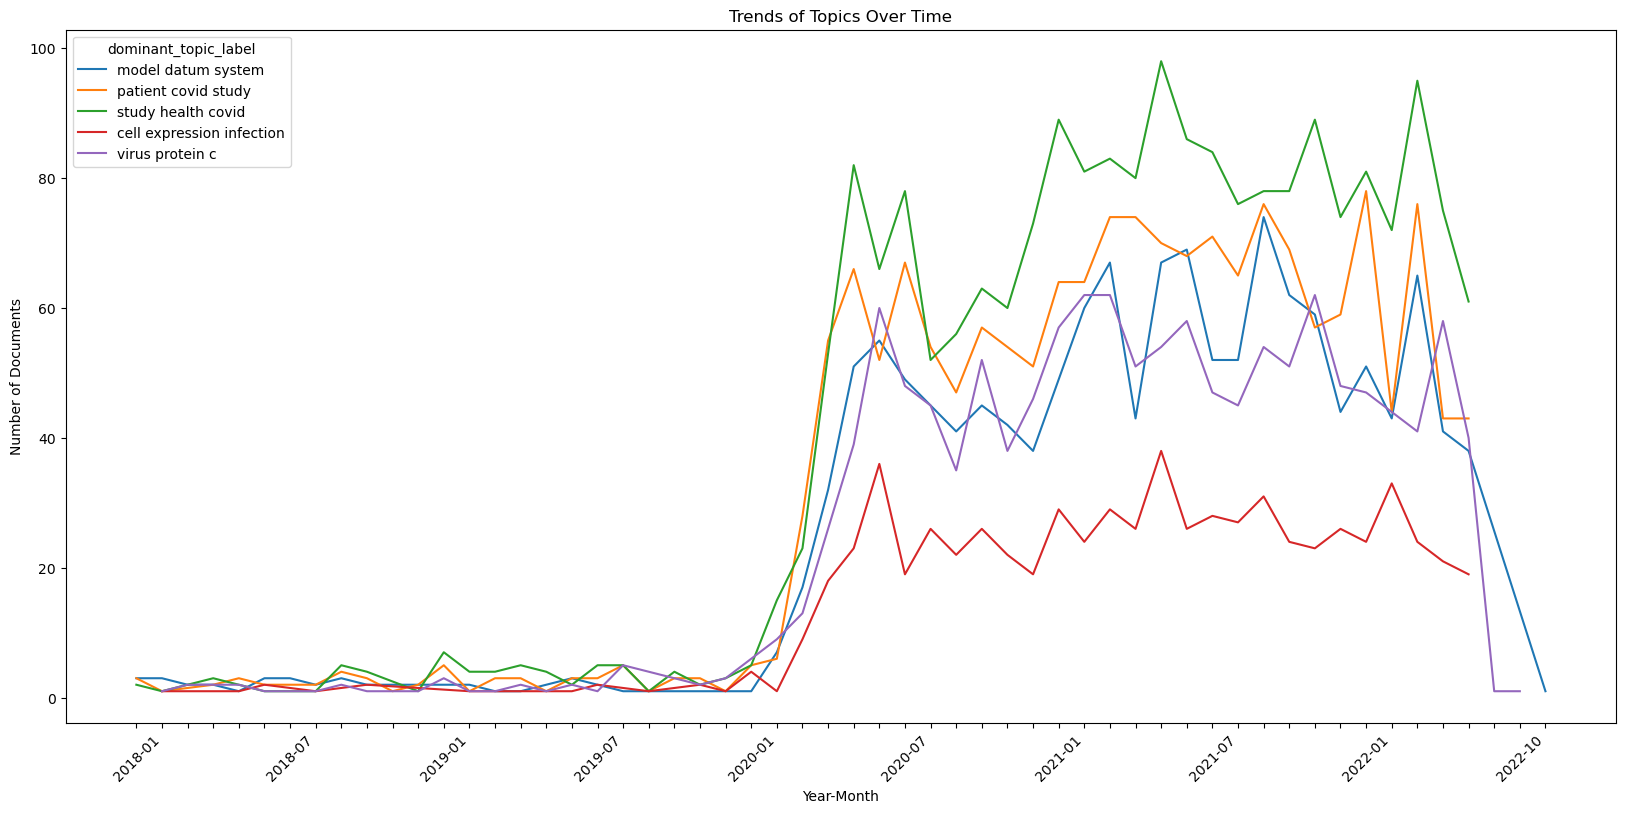

In [42]:
# Trends in visualization
import seaborn as sns

plt.figure(figsize=(20, 9))
sns.lineplot(data=trend_df, x='year_month', y='document_count', hue='dominant_topic_label')
plt.title('Trends of Topics Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Documents')

plt.xticks(rotation=45)

ax = plt.gca()
labels = ax.get_xticklabels()

for i, label in enumerate(labels):
    if i % 6 != 0:   # Displayed every six months
        label.set_visible(False)

plt.show()

In [43]:
# Association Analysis cancellation variable:

df3_3=nlp=my_stop_words=process_text_value=None
vectorizer=X=tfidf_df=transactions=0
te=te_ary=df_fpgrowth=frequent_itemsets=None
rules=filtered_rules=nt=None
invalid_time_df=df3_3_cutoff_timme=dictionary=corpus=None
lda_model=trend_df=None

# Similarity Analysis

In [44]:
# Reassign a df
# df3_4 = df.copy(deep=True)
df3_4 = df # direct ref
df3_4.columns

Index(['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title',
       'journal', 'abstract_summary', 'publish_time', 'language'],
      dtype='object')

In [45]:
# Text length distribution
sample_column_name = ["body_text", "abstract", "abstract_summary", "authors", "title"]
sample_column_name = df3_4.columns
print(df3_4)
for _sample_column in sample_column_name:
    print(_sample_column)
    print("Total Len of {}:".format(_sample_column), sum([len(text) for text in df3_4[_sample_column]]),
          " ==========  Average Len: ", sum([len(text) for text in df3_4[_sample_column]]) / len(df3_4[_sample_column]) )

# len: body_text > abstract > abstract_summary > authors > title

                                      paper_id                            doi  \
0     0015cecc2298c3bdb9bda0e0b84b38ebdcca716f     10.1007/s40744-022-00425-0   
1     0016a5c32e9cea6002cf6f352ecdb5231c7e3194  10.30699/ijp.2020.127312.2387   
2     0020e5c796f50e927b96ff0b7ea375b4745261a3     10.1186/s12887-020-02112-x   
3     00234390dbc45e3370ac8f80cbd93cec3777ca92     10.1016/j.ajur.2021.03.006   
4     0025fd87cfaf7953079b618771218b8de6893928      10.3389/fcell.2021.748905   
...                                        ...                            ...   
9016  ffd14bf217eec2bbb52bed66f4b6eed8dc94a088       10.1021/acsomega.1c02124   
9017  ffd4367834e01b6e52b489703a029c08aa728be4      10.3389/fmicb.2021.741863   
9018  ffd883eded0e9508d6f946ec43e278cf55f1ba54      10.3389/fpsyg.2020.576515   
9019  ffe5a37d54ea8e238b7f1eb17ada83d8ae70455b              10.3390/v13081637   
9021  fff916d39d32964557ff04905160d769542720dc     10.1186/s12887-020-02415-z   

                           

## Explore the text length distribution

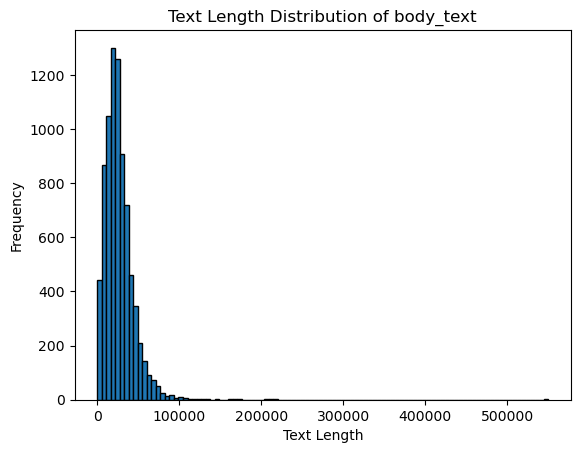

boxplot Info of body_text
Median:  23556.0
Q1:  14973.25
Q3:  34112.25


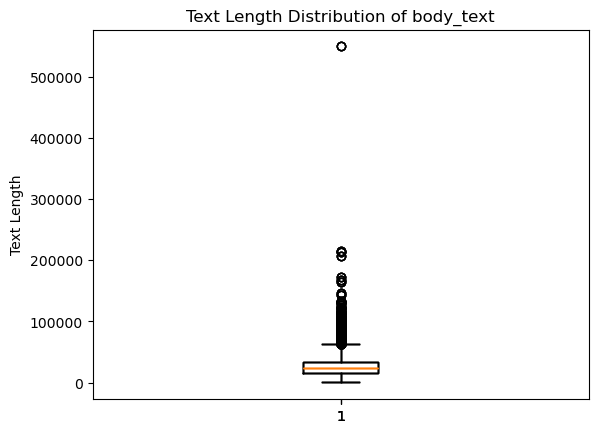

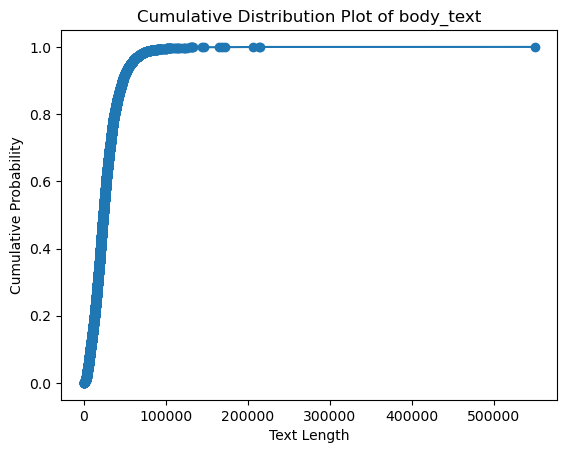

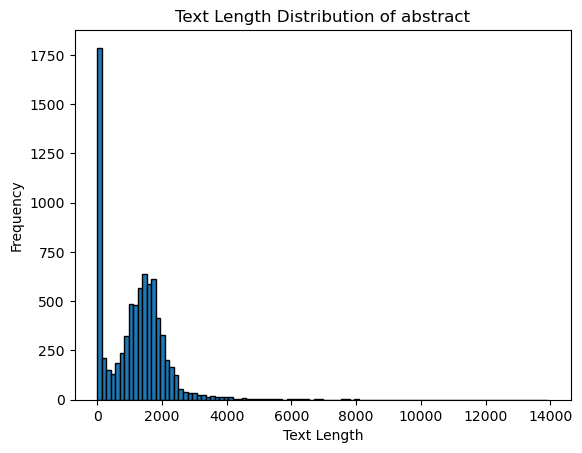

boxplot Info of abstract
Median:  1262.0
Q1:  285.75
Q3:  1724.0


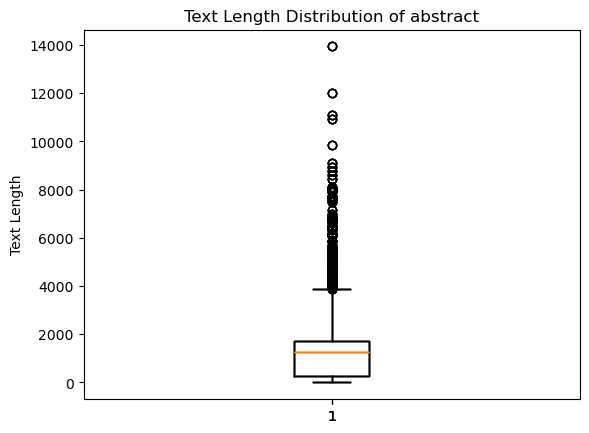

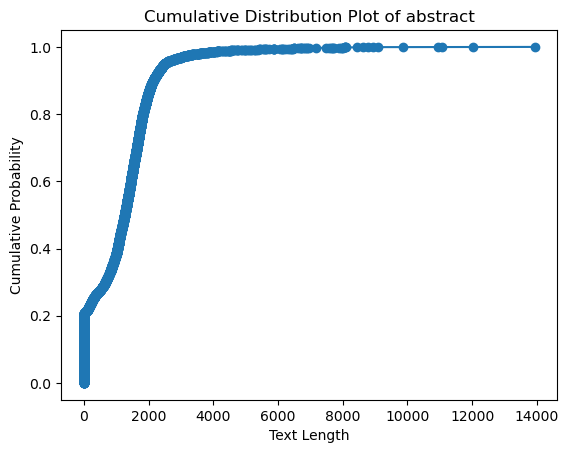

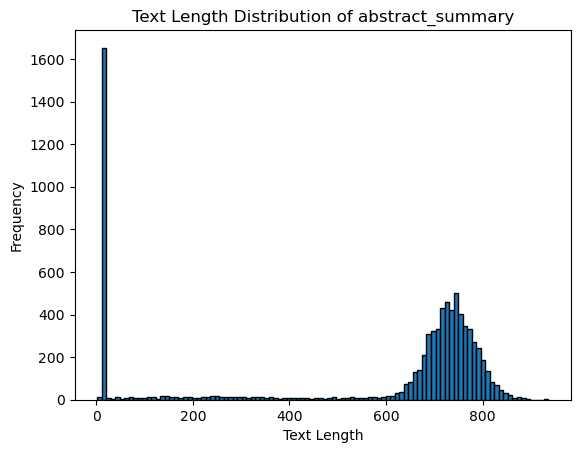

boxplot Info of abstract_summary
Median:  712.0
Q1:  301.75
Q3:  754.0


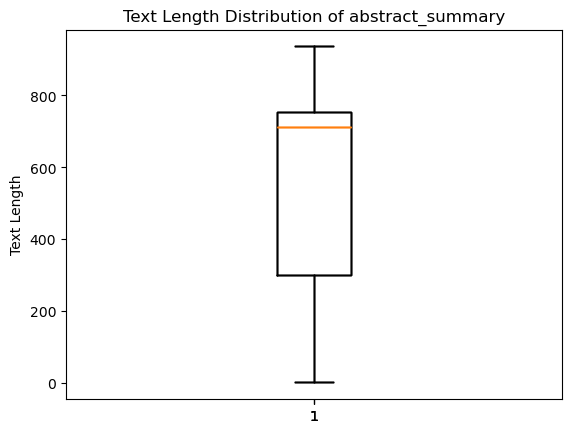

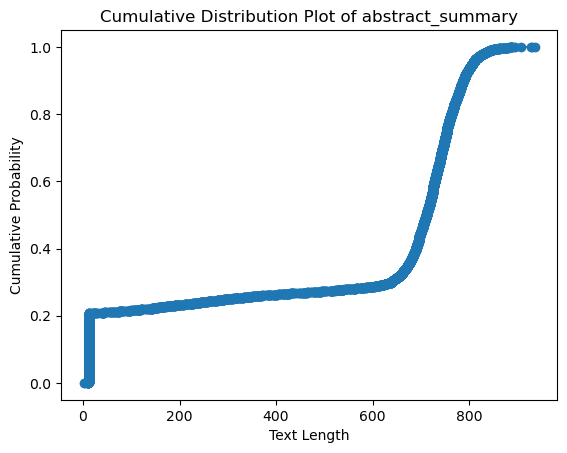

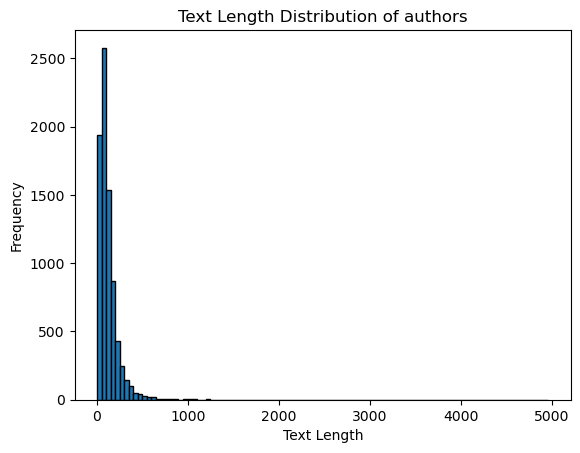

boxplot Info of authors
Median:  94.0
Q1:  57.0
Q3:  153.0


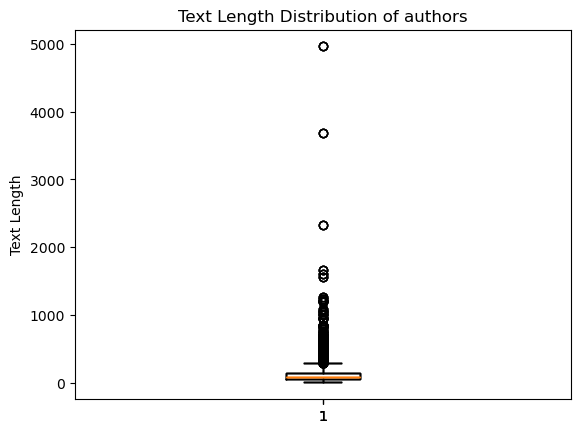

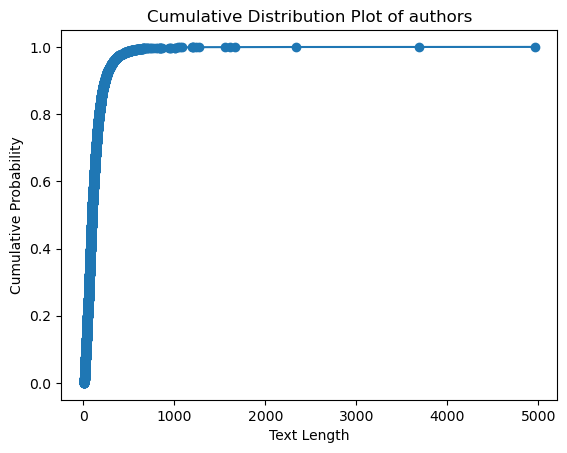

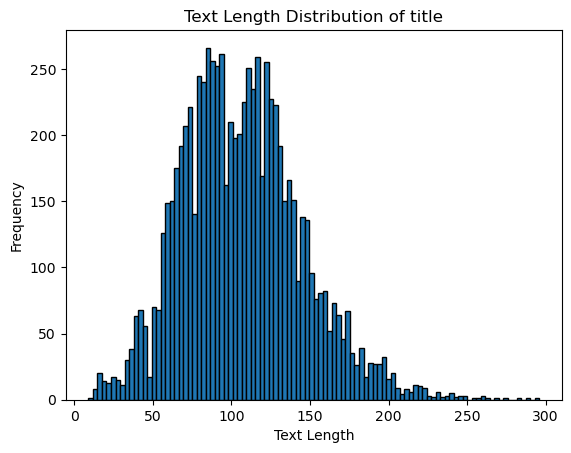

boxplot Info of title
Median:  104.0
Q1:  79.0
Q3:  130.0


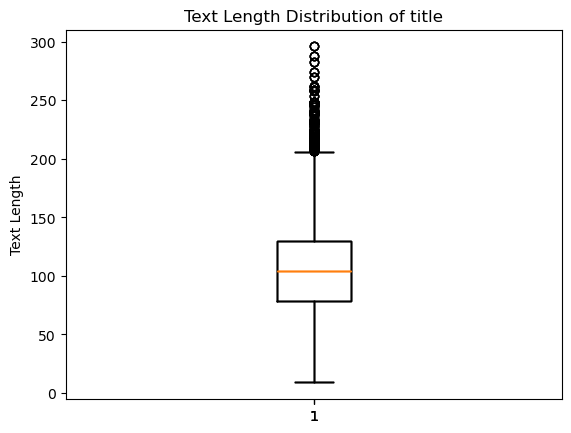

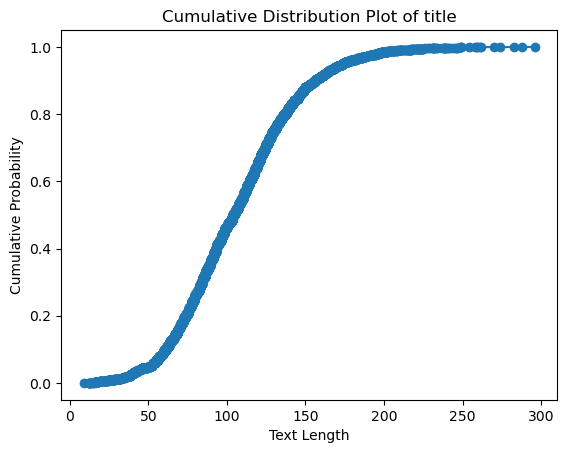

In [46]:
sample_column_name = ["body_text", "abstract", "abstract_summary", "authors", "title"]

import matplotlib.pyplot as plt

# Plotting each subgraph
for i in range(5):
    _sample_column = sample_column_name[i]
    # Calculate text length
    text_lengths = [len(text) for text in df3_4[_sample_column]]
    
    for j in range(3):
        if j==0:
            # Plotting histograms
            plt.hist(text_lengths, bins=100, edgecolor='black')
            # Setting the title and axis labels
            plt.title('Text Length Distribution of {}'.format(_sample_column))
            plt.xlabel('Text Length')
            plt.ylabel('Frequency')
        
        elif j==1:
            # Plotting Box Lines
            plt.boxplot(text_lengths)
            # Setting the title and axis labels
            plt.title('Text Length Distribution of {}'.format(_sample_column))
            plt.ylabel('Text Length')
            # Get details of the box plot
            statistics = plt.boxplot(text_lengths)['medians'][0].get_ydata()
            median = statistics[0]
            q1 = plt.boxplot(text_lengths)['boxes'][0].get_ydata()[0]
            q3 = plt.boxplot(text_lengths)['boxes'][0].get_ydata()[2]
            # Output details
            print("boxplot Info of {}".format(_sample_column))
            print("Median: ", median)
            print("Q1: ", q1)
            print("Q3: ", q3)
        
        elif j==2:
            # Calculate the cumulative distribution function
            sorted_lengths = np.sort(text_lengths)
            cumulative_prob = np.arange(len(sorted_lengths)) / float(len(sorted_lengths))
            # Mapping of cumulative distribution
            plt.plot(sorted_lengths, cumulative_prob, marker='o')
            # Setting the title and axis labels
            plt.title('Cumulative Distribution Plot of {}'.format(_sample_column))
            plt.xlabel('Text Length')
            plt.ylabel('Cumulative Probability')    

        # Display Graphics
        plt.show()

In [47]:
# length
# body_text > abstract >= abstract_summary >= authors, title

## Distance metrics used to measure text similarity

### Jaccard implementation

In [48]:
# When measuring the similarity between two texts, the Jaccard coefficient can be used to calculate how similar they are.
def jaccard(text1, text2):
    set1 = set(build_shingles(text1,K)) # set(text1.lower().split())
    set2 = set(build_shingles(text2,K)) # set(text2.lower().split())
    # Calculate the length of the intersection intersection and the union union of two sets. 
    # Finally we use the ratio of intersection to union to compute the Jaccard coefficient
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    if union==0:return 1 # Two empty sets
    jaccard_coefficient = intersection / union
    return jaccard_coefficient


### splitwords() as an alternative

In [49]:
# A word embedding method that is much faster than shingle memory and time
def split_into_word_set(text):
    text = text + " "
    wnd = ""
    word_list = []
    for _i in range(len(text)):
        if (text[_i]>="A" and text[_i]<="Z") or (text[_i]>="a" and text[_i]<="z") or (text[_i]>="0" and text[_i]<="9"):
            # Char or Number limited
            wnd = wnd + text[_i]
        else:
            _threshold = 3 # leave out meaning less  word
            if len(wnd)>=_threshold:
                word_list.append(wnd)
            wnd = ""
    return set(word_list)

In [50]:
# preprocessing Indexs have lost and exists.
sets_rec = []
Idx_rec = []
err_rec = []
for i in range(len(df3_4["abstract"])):
    try:
        sets_rec.append(split_into_word_set(df3_4["abstract"][i]))
        Idx_rec.append(i)
    except KeyError:
        sets_rec.append(set([]))
        err_rec.append(i)
print("{} Indexs have lost. ".format(len(err_rec)))
print("{} Indexs exists. ".format(len(Idx_rec)))  # Even if the index exists, the content may be empty

tot_hascontent = tot_nocontent = 0
for idx in Idx_rec:
    if len(df3_4["abstract"][idx]) == 0:
        tot_nocontent +=1
    else:
        tot_hascontent+=1
        
print()
print("{} Indexs have content. ".format(tot_hascontent))
print("{} Indexs exist but have no content. ".format(tot_nocontent))  # Even if the index exists, the content may be empty

881 Indexs have lost. 
7147 Indexs exists. 

5682 Indexs have content. 
1465 Indexs exist but have no content. 


In [51]:
# Q1 = 285.75
# Mdedian = 1262.0
for i in range(0,len(df3_4["abstract"])):
    if i in Idx_rec:
        _str = df3_4["abstract"][i]
        _str = _str + df3_4["body_text"][i] + df3_4["authors"][i] + df3_4["title"][i]
        
        if len(_str)<=1262:
            df3_4["abstract"][i] = _str
        else:
            df3_4["abstract"][i] = _str[:1262]
# padding

In [52]:
# Reprocessing Indexs have lost and exists.
sets_rec = []
Idx_rec = []
err_rec = []
for i in range(len(df3_4["abstract"])):
    try:
        sets_rec.append(split_into_word_set(df3_4["abstract"][i]))
        Idx_rec.append(i)
    except KeyError:
        sets_rec.append(set([]))
        err_rec.append(i)
print("{} Indexs have lost. ".format(len(err_rec)))
print("{} Indexs exists. ".format(len(Idx_rec)))

tot_hascontent = tot_nocontent = 0
for idx in Idx_rec:
    if len(df3_4["abstract"][idx]) == 0:
        tot_nocontent +=1
    else:
        tot_hascontent+=1
        
print()
print("{} Indexs have content. ".format(tot_hascontent))
print("{} Indexs exist but have no content. ".format(tot_nocontent))

881 Indexs have lost. 
7147 Indexs exists. 

7147 Indexs have content. 
0 Indexs exist but have no content. 


### Calculation of the Jaccard matrix

In [53]:
# Calculate the Jaccard matrix
# The following steps reflect the fact that, when we consider the complexity of finding similar vector pairs, the amount of computation required to compare everything is unmanageable even if the dataset is quite small O(n^2)
# Longer running time

In [54]:
import time
starttime_for_Jamatrix = time.time()
K = 4  # shingle size

def build_shingles(text: str, k: int):
    shingle_set = []
    for i in range(len(text) - k+1):
        shingle_set.append(text[i:i+k])
    return set(shingle_set)


import csv
file_path = "Jaccard_matrix_K{}.csv".format(K)
Jaccard_matrix = []
if os.path.isfile(file_path):
    with open(file_path,"r") as file:
        reader = csv.reader(file)
        for row in reader:
            Jaccard_matrix.append([float(cell) for cell in row])
else:
    Jaccard_matrix = [[0 for i in range(len(df3_4["abstract"]))] for i in range(len(df3_4["abstract"]))]
    for i in range(len(df3_4["abstract"])):
        if i% 1000 ==1 : print("Running for Jaccard matrix:  ", "Line:",i,"/",len(df3_4["abstract"]), 
                                                                            " Time == ", time.time() - starttime_for_Jamatrix)
        for j in range(i+1,len(df3_4["abstract"])):
            # if i not in err_rec and j not in err_rec and len(df3_4["abstract"][i])!=0 and len(df3_4["abstract"][j])!=0:
            if i not in err_rec and j not in err_rec:
                LOWERBOUND = 286
                UPPERBOUND = 1724
                sentence0=df3_4["abstract"][i]
                sentence1=df3_4["abstract"][j]
                if len(sentence0)<=LOWERBOUND:
                    sentence0 = sentence0+df3_4['body_text'][i]
                if len(sentence0)>UPPERBOUND:
                   sentence0 = sentence0[:UPPERBOUND]
                if len(sentence1)<=LOWERBOUND:
                    sentence1 = sentence1+df3_4['body_text'][j]
                if len(sentence1)>UPPERBOUND:
                   sentence1 = sentence1[:UPPERBOUND]
                Jaccard_matrix[j][i]=Jaccard_matrix[i][j]=jaccard(sentence0,sentence1) 
    print("Total time for calculating Jaccard_matrix with len of {}".format(len(df3_4["abstract"]))," is ", time.time() - starttime_for_Jamatrix)

    # Storage Matrix
    with open (file_path,"w",newline="") as file:
        writer=csv.writer(file)
        writer.writerows(Jaccard_matrix)
    print("Jaccard matrix has been sucessfully storaged. ")

Running for Jaccard matrix:   Line: 1 / 8028  Time ==  12.825551509857178
Running for Jaccard matrix:   Line: 1001 / 8028  Time ==  6829.146983861923
Running for Jaccard matrix:   Line: 2001 / 8028  Time ==  12820.409565925598
Running for Jaccard matrix:   Line: 3001 / 8028  Time ==  17806.000751018524
Running for Jaccard matrix:   Line: 4001 / 8028  Time ==  21925.726714611053
Running for Jaccard matrix:   Line: 5001 / 8028  Time ==  25115.899661302567
Running for Jaccard matrix:   Line: 6001 / 8028  Time ==  27385.954568862915
Running for Jaccard matrix:   Line: 7001 / 8028  Time ==  28749.353070497513
Running for Jaccard matrix:   Line: 8001 / 8028  Time ==  29231.32354569435
Total time for calculating Jaccard_matrix with len of 8028  is  29231.63517642021
Jaccard matrix has been sucessfully storaged. 


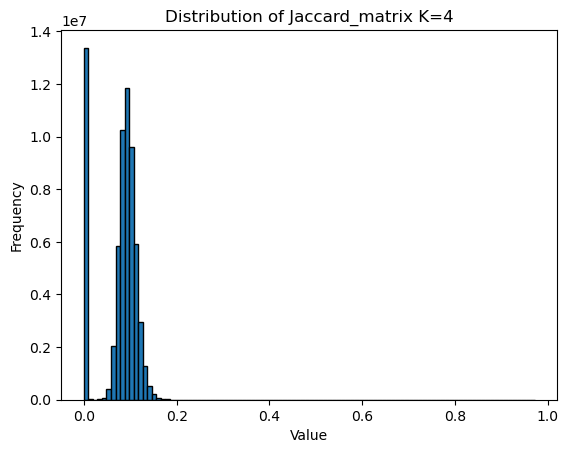

In [55]:
# Distribution of Jaccard values
import numpy as np
import matplotlib.pyplot as plt
K=4
def __plot(mtx):
    matrix_flat = np.array(mtx).flatten()
    # matrix_flat = matrix_flat[ matrix_flat<=0.2 ]
    
    plt.hist(matrix_flat, bins=100, edgecolor='black')
    plt.title('Distribution of Jaccard_matrix K={}'.format(K))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

__plot(Jaccard_matrix)

## LSH basic implementation

In [56]:
# LSH consists of several different methods. Traditional methods (with multiple steps): shingling, MinHashing and finally banded LSH functions. 
# There is no single hashing method in LSH. In fact, they all share the same logic of "grouping similar samples by hash function", but they can be very different from each other.

In [57]:
UPPERBOUND = 1724 # Decrease if running takes very long time e.g. 862
LOWERBOUND = 286
# Q1 286, Q3 1724
# K=4 would cost much memory, be carefull on your machine

In [58]:
sentences = df3_4['abstract'].tolist()
for i in range(len(sentences)):
    try:
        if len(sentences[i])<=LOWERBOUND:
            sentences[i]=sentences[i]+df3_4['body_text'][i]
        if len(sentences[i])>UPPERBOUND:
            sentences[i]=sentences[i][:UPPERBOUND]
    except KeyError:
        pass
sentences[:3]

["Coronavirus disease 2019 caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) is a matter of concern worldwide and a huge challenge for rheumatologists. Indeed, several antirheumatic drugs are currently used at different stages of COVID-19, such as several cytokine inhibitors and colchicine. Colchicine is one of the oldest medicines with potent anti-inflammatory properties. In rheumatic diseases it is widely used for the treatment of gout, calcium pyrophosphate deposition disease, and familial Mediterranean fever. It is also used off-label in cardiology to treat atrial fibrillation, pericarditis, and myocardial infarction. Over the last few years, advances in the understanding of colchicine's mechanism of action and its pharmacology and safety have made colchicine a promising candidate agent for the fight against COVID-19. In this review, we discuss COVID-19 pathophysiology highlighting colchicine's mode of action, its pleiotropic effects on neutrophils, inflamm

In [59]:
def build_shingles(text: str, k: int):
    shingle_set = []
    for i in range(len(text) - k+1):
        shingle_set.append(text[i:i+k])
    return set(shingle_set)

In [60]:
def build_vocab(singles):
    merge_single_set = set([])
    for shingle_set in singles:
        merge_single_set = merge_single_set.union(shingle_set)
    return list(merge_single_set)

In [61]:
def one_hot(shingle_set, vocab: list):
    onehot_vec = []
    for i in range(0,len(vocab)):
        if vocab[i] in shingle_set:
            onehot_vec.append(1)
        else:
            onehot_vec.append(0)
    # len(onehot_vec ) == len(vocab)
    return onehot_vec

In [62]:
# Generate a single alignment
import copy
def get_minhash_permutation_arr(arr0):
    from random import shuffle
    arr1 = copy.deepcopy(arr0)
    shuffle(arr1)
    return arr1
# Generate all alignments
def get_minhash_permutation_arrs(size_x,size_y,arr_seed=[]):
    arrs = []
    if len(arr_seed)!=size_x:arr_seed = [i for i in range(size_x)]
    for _ in range(size_y):
        arr_seed = copy.deepcopy(get_minhash_permutation_arr(arr_seed))
        arr_seed = copy.deepcopy(get_minhash_permutation_arr(arr_seed))
        arrs.append(arr_seed)
    return arrs

In [63]:
# Generate 1 signature
def get_signature(vector, permutation_arrs):
    signature = []
    for permutation_arr in permutation_arrs:
        flag = False
        for i in range(0,len(permutation_arr)):
            if vector[permutation_arr[i]]==1:
                signature.append(i)
                flag = True
                break
        if not flag: signature.append(len(signature))
    return signature

In [64]:
K = 4  # shingle size

# build shingles
shingles = []
for sentence in sentences:
    shingles.append(build_shingles(sentence, K))

# build vocab
vocab = build_vocab(shingles)
# if len(vocab)>150000: vocab=vocab[:150000] #truncate

print(len(vocab))

212464


### Shingling

In [65]:
# K - len(vocab)
leng_list = []
costT_list = []
K_list = []

In [66]:
# build shingles
shingles = []
for sentence in sentences:
    shingles.append(build_shingles(sentence, K))

# build vocab
vocab = build_vocab(shingles)
# if len(vocab)>150000: vocab=vocab[:150000] #truncate

In [67]:
print(len(vocab))
print(len(shingles))
print(len(shingles[0]))

212464
8028
929


### building onehot - first slice
if use total 8028 length at a time, Memery Error
so divided into 2 slices averagably, and do two times

In [68]:
# one-hot encode our shingles
shingles_1hot = []
__cnt = 0
for i in range(0,int(len(shingles)/2)):
    shingle_set = shingles[i]
    if __cnt % 100 == 0: print("This is ", __cnt)
    __cnt+=1
    shingles_1hot.append(one_hot(shingle_set, vocab))

This is  0
This is  100
This is  200
This is  300
This is  400
This is  500
This is  600
This is  700
This is  800
This is  900
This is  1000
This is  1100
This is  1200
This is  1300
This is  1400
This is  1500
This is  1600
This is  1700
This is  1800
This is  1900
This is  2000
This is  2100
This is  2200
This is  2300
This is  2400
This is  2500
This is  2600
This is  2700
This is  2800
This is  2900
This is  3000
This is  3100
This is  3200
This is  3300
This is  3400
This is  3500
This is  3600
This is  3700
This is  3800
This is  3900
This is  4000


In [69]:
print(len(shingles_1hot))
print(len(shingles_1hot[0]))
print(len(vocab))
# Too long a vocab can lead to a memory explosion, especially if you're using shingling.
# K = 8 , len(vocab) == 2195986 It's too long.
# K = 4

4014
212464
212464


In [70]:
sum(shingles_1hot[0])  # confirm we have 1s

929

### Minhash - first time

In [71]:
permutation_arrs = get_minhash_permutation_arrs(size_x=len(vocab), size_y=100)

signatures = []
cnt = 0
for vector in shingles_1hot:
    cnt = cnt + 1
    if cnt % 100 ==0: print(len(signatures),"/",len(shingles_1hot))
    signatures.append(get_signature(vector, permutation_arrs))

# merge signatures into single array
# signatures = np.stack(signatures)
# signatures.shape

99 / 4014
199 / 4014
299 / 4014
399 / 4014
499 / 4014
599 / 4014
699 / 4014
799 / 4014
899 / 4014
999 / 4014
1099 / 4014
1199 / 4014
1299 / 4014
1399 / 4014
1499 / 4014
1599 / 4014
1699 / 4014
1799 / 4014
1899 / 4014
1999 / 4014
2099 / 4014
2199 / 4014
2299 / 4014
2399 / 4014
2499 / 4014
2599 / 4014
2699 / 4014
2799 / 4014
2899 / 4014
2999 / 4014
3099 / 4014
3199 / 4014
3299 / 4014
3399 / 4014
3499 / 4014
3599 / 4014
3699 / 4014
3799 / 4014
3899 / 4014
3999 / 4014


In [72]:
print(np.array(signatures[:10][:10]))

[[  10   47  262   43  157   42  274    7  282   10   38  160 1046  181
     7   52  346  191  129  633   21  114  313  624  406  705  169  112
   397  442  334  309   30   72  111   31  267  134  177  413  330  122
   303  240    2  330  327  588 1039   11   61  364   66  409  103  102
   152  562    3   19  113  217   55    5   62  570  113  102   81  116
    79  269  186  438  121   87  112   12  164   48  195  100  256  354
   138  205  251  261  110   25   27  952   51   47  524   27  100  222
   544  213]
 [ 124   43  118   68  199   42   90   39  504  286    5  261  549  149
     7  131  177   34  248  182  171   26  261  112   24  269  103   98
   137  158   16  173  149   86  183  299  628   54  156    0   62   53
     9   47   83  537  456   65    1  197   31  606   92  250   69  150
   279   43  180  321   87   43  321   87    7  119   13  216  102   44
   140   29  189   44  425  263  221  431   44   18  245  130    0  234
    38  180   69   95  440  422   68   22   71   47

### building onehot - second slice
if use total 8028 length at a time, Memery Error
so divided into 2 slices averagably, and do two times

In [73]:
# one-hot encode our shingles - carry on
shingles_1hot = []
for i in range(int(len(shingles)/2),len(shingles)):
    shingle_set = shingles[i]
    if __cnt % 100 == 0: print("This is ", __cnt)
    __cnt+=1
    shingles_1hot.append(one_hot(shingle_set, vocab))

This is  4100
This is  4200
This is  4300
This is  4400
This is  4500
This is  4600
This is  4700
This is  4800
This is  4900
This is  5000
This is  5100
This is  5200
This is  5300
This is  5400
This is  5500
This is  5600
This is  5700
This is  5800
This is  5900
This is  6000
This is  6100
This is  6200
This is  6300
This is  6400
This is  6500
This is  6600
This is  6700
This is  6800
This is  6900
This is  7000
This is  7100
This is  7200
This is  7300
This is  7400
This is  7500
This is  7600
This is  7700
This is  7800
This is  7900
This is  8000


### Minhash - second time

In [74]:
for vector in shingles_1hot:
    cnt = cnt + 1
    if cnt % 100 ==0: print(len(signatures),"/",len(shingles_1hot)*2)
    signatures.append(get_signature(vector, permutation_arrs))

# merge signatures into single array
signatures = np.stack(signatures)
signatures.shape

4099 / 8028
4199 / 8028
4299 / 8028
4399 / 8028
4499 / 8028
4599 / 8028
4699 / 8028
4799 / 8028
4899 / 8028
4999 / 8028
5099 / 8028
5199 / 8028
5299 / 8028
5399 / 8028
5499 / 8028
5599 / 8028
5699 / 8028
5799 / 8028
5899 / 8028
5999 / 8028
6099 / 8028
6199 / 8028
6299 / 8028
6399 / 8028
6499 / 8028
6599 / 8028
6699 / 8028
6799 / 8028
6899 / 8028
6999 / 8028
7099 / 8028
7199 / 8028
7299 / 8028
7399 / 8028
7499 / 8028
7599 / 8028
7699 / 8028
7799 / 8028
7899 / 8028
7999 / 8028


(8028, 100)

In [75]:
# calcel shingles_1hot
shingles_1hot = None

### LSH 

In [76]:
# LSH : Finally, we move onto the LSH process. We will use a class here:
from itertools import combinations

class LSH:
    buckets = []
    counter = 0
    def __init__(self, b):
        self.b = b
        for i in range(b):
            self.buckets.append({})

    def make_subvecs(self, signature):
        l = len(signature)
        assert l % self.b == 0
        r = int(l / self.b)
        # break signature into subvectors
        subvecs = []
        for i in range(0, l, r):
            subvecs.append(signature[i:i+r])
        return np.stack(subvecs)
    
    def add_hash(self, signature):
        subvecs = self.make_subvecs(signature).astype(str)
        for i, subvec in enumerate(subvecs):
            subvec = ','.join(subvec)
            if subvec not in self.buckets[i].keys():
                self.buckets[i][subvec] = []
            self.buckets[i][subvec].append(self.counter)
        self.counter += 1

    def check_candidates(self):
        candidates = []
        for bucket_band in self.buckets:
            keys = bucket_band.keys()
            for bucket in keys:
                hits = bucket_band[bucket]
                if len(hits) > 1:
                    candidates.extend(combinations(hits, 2))
        return set(candidates)

In [77]:
band = 20
lsh = LSH(band)

for signature in signatures:
    lsh.add_hash(signature)

In [78]:
lsh.buckets

[{'10,47,262,43,157': [0],
  '124,43,118,68,199': [1],
  '248,47,262,43,102': [2],
  '10,567,262,100,271': [3],
  '259,188,69,43,75': [4],
  '237,18,186,100,182': [5],
  '248,18,262,52,40': [6],
  '157,55,58,43,242': [7],
  '1207,47,262,36,311': [8],
  '135,192,65,43,67': [9],
  '259,55,118,43,153': [10],
  '272,188,69,504,0': [11],
  '50,18,11,26,461': [12],
  '183,353,43,43,412': [13],
  '404,18,262,100,271': [14],
  '183,18,262,57,410': [15, 7113],
  '237,47,262,52,58': [16],
  '237,47,262,68,271': [17],
  '50,449,168,43,393': [18],
  '166,723,262,26,271': [19],
  '154,650,366,341,143': [20],
  '183,47,710,43,410': [21],
  '10,47,185,855,410': [22],
  '259,47,262,430,262': [23],
  '10,241,459,610,412': [24],
  '404,18,652,52,242': [25],
  '10,912,262,4,73': [26],
  '237,18,69,52,107': [27],
  '183,18,276,46,403': [28],
  '259,192,123,26,636': [29],
  '124,115,262,608,156': [30],
  '50,110,233,43,411': [31],
  '50,47,262,52,516': [32],
  '50,110,262,2,271': [33],
  '50,70,372,536,157

In [79]:
candidate_pairs = lsh.check_candidates()
len(candidate_pairs)

6560

In [80]:
list(candidate_pairs)[:5]

[(2563, 3079), (481, 4128), (4584, 5955), (1377, 2465), (1387, 3907)]

###  P-s plot result - Optimizing the Bands

In [81]:
## Optimizing the Bands

# Now let's visualize the actual cosine similarity of our signature vectors against whether we identified the signatures as candidate pairs or not.

# (we will also calculate Jaccard but it's less useful here, try both!)

In [82]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics.pairwise import cosine_similarity


def jaccard_for_set(set1,set2):
    # Calculate the length of the intersection intersection and the union union of two sets. 
    # Finally we use the ratio of intersection to union to compute the Jaccard coefficient
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    if union==0:return 1 # Two empty sets
    jaccard_coefficient = intersection / union
    return jaccard_coefficient

pairs = pd.DataFrame({
    'x': [],
    'y': [],
    'jaccard': [],
    'cosine': [],
    'candidate': []
})

data_len = len(signatures)
chosen = set()
# take random sample of pairs
sample_size = 50_000
for _ in range(sample_size):
    x, y = np.random.choice(data_len, 2)
    if x == y or (x, y) in chosen: continue
    chosen.add((x, y))
    vector_x = signatures[x]
    vector_y = signatures[y]
    candidate = 1 if (x, y) in candidate_pairs else 0
    cosine = cosine_similarity([vector_x], [vector_y])[0][0]
    pairs = pd.concat([pairs,pd.DataFrame([{
        'x': x,
        'y': y,
        'jaccard': jaccard_for_set(set(vector_x), set(vector_y)),
        'cosine': cosine,
        'candidate': candidate
    }])], ignore_index=True)


# add a normalized cosine column for better alignment
cos_min = pairs['cosine'].min()
cos_max = pairs['cosine'].max()
pairs['cosine_norm'] = (pairs['cosine'] - cos_min) / (cos_max - cos_min)

<Axes: xlabel='cosine', ylabel='candidate'>

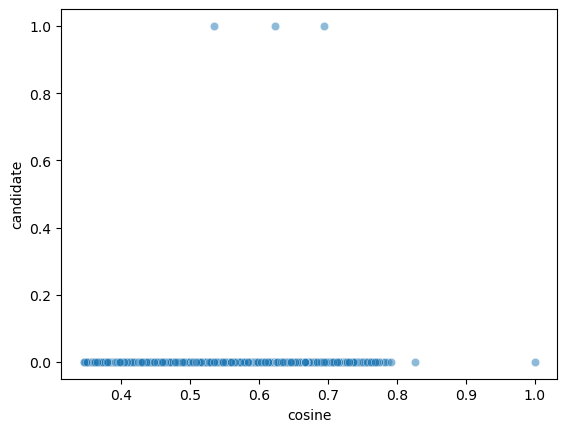

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pairs, x='cosine', y='candidate', alpha=0.5)

In [84]:
def probability(s, r, b):
    # s: similarity
    # r: rows (per band)
    # b: number of bands
    return 1 - (1 - s**r)**b

def normalize(x, x_min, x_max):
    return (x - x_min) / (x_max - x_min)

<Axes: xlabel='cosine', ylabel='candidate'>

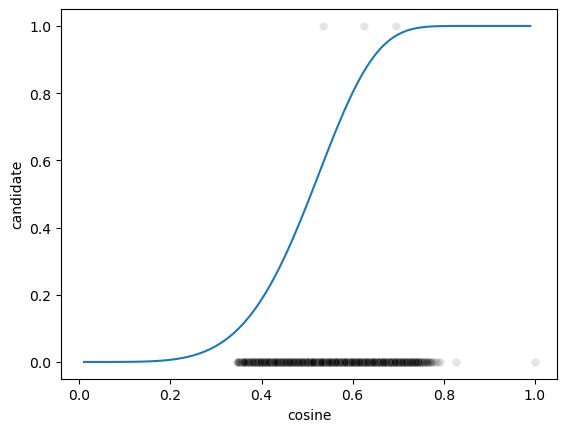

In [85]:
b = 20
r = int(100 / b)
s_scores = np.arange(0.01, 1, 0.01)
P_scores = [probability(s, r, b) for s in s_scores]

sns.lineplot(x=s_scores, y=P_scores)
sns.scatterplot(data=pairs, x='cosine', y='candidate', alpha=0.1, color='k')

<Axes: xlabel='cosine_norm', ylabel='candidate'>

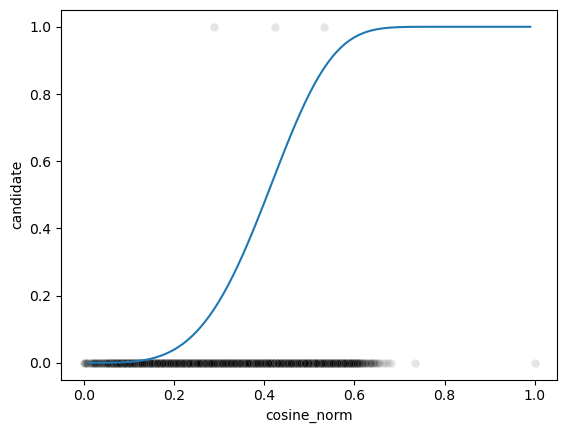

In [86]:
b = 25
r = int(100 / b)
s_scores = np.arange(0.01, 1, 0.01)
P_scores = [probability(s, r, b) for s in s_scores]

sns.lineplot(x=s_scores, y=P_scores)
sns.scatterplot(data=pairs, x='cosine_norm', y='candidate', alpha=0.1, color='k')

We will choose the green line (band = 25)


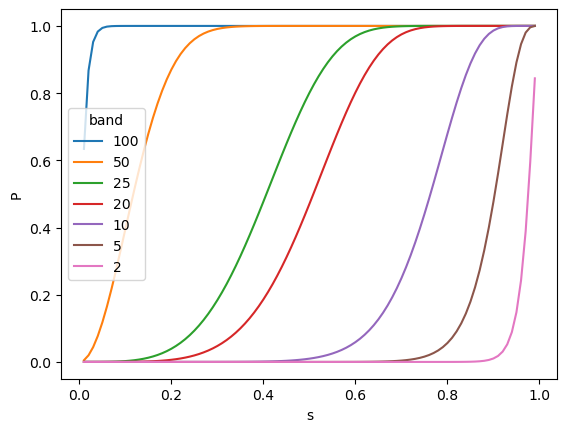

In [87]:
# Grid Search b
probs = pd.DataFrame({
    'P': [],
    's': [],
    'b': []
})

for b in [100, 50, 25, 20, 10, 5, 2]:
    r = int(100 / b)
    s_scores = np.arange(0.01, 1, 0.01)
    P_scores = [probability(s, r, b) for s in s_scores]
    probs = pd.concat([probs, pd.DataFrame({
        'P': P_scores,
        's': s_scores,
        'band': [str(b)]*len(s_scores)
    })], ignore_index =True)

sns.lineplot(data=probs, x='s', y='P', hue='band')
print("We will choose the green line (band = 25)")

## Experiments using implemented models

In [88]:
!pip install datasketch

In [89]:
# pick 'abstract' column as text

from datasketch import MinHash, MinHashLSH
print(df3_4["abstract"].head(10))

0     Coronavirus disease 2019 caused by the severe ...
1     Severe acute respiratory syndrome coronavirus ...
2     Background: One major limitation for less inva...
3     Objective: To identify the impact of COVID-19 ...
4     The concept of specialized "membrane microdoma...
5     The frightening capacity for contamination and...
6     Throughout history, disease outbreaks have wor...
7     Mesenchymal stem cells (MSCs) are self-renewin...
9     We used three comprehensive datasets to assess...
10    This article draws on the psychoanalyst Melani...
Name: abstract, dtype: object


In [90]:
MinHash_list = [MinHash(num_perm=128) for i in range(len(df3_4["abstract"]))]  # MinHash for all
for i in range(len(Idx_rec)):
    idx = Idx_rec[i]
    for d in sets_rec[idx]:
        MinHash_list[idx].update(d.encode('utf-8'))

In [91]:
# Create LSH index
lsh = MinHashLSH(threshold=0.5, num_perm=128)  # hyperparameterisation

query = [1] # take paper 1 as example
# All papaer have no content(no abstract)

for i in range(len(Idx_rec)):
    idx = Idx_rec[i]
    if idx not in query:
        lsh.insert(str(idx),MinHash_list[idx])

result = lsh.query(MinHash_list[1])
print("LEN of result: ", len(result))

LEN of result:  0


In [92]:
# Create LSH index
# e.g.
lsh = MinHashLSH(threshold=0.5, num_perm=128)

query = [3] # take paper 0 as example
# All papaer have no content(no abstract)

for i in range(len(Idx_rec)):
    idx = Idx_rec[i]
    if idx not in query:
        lsh.insert(str(idx),MinHash_list[idx])

result = lsh.query(MinHash_list[3])
print("LEN of result: ", len(result))
print("Approximate neighbours with Jaccard similarity > 0.5", result)   # The similarity of the vast majority of articles is not high.

LEN of result:  1
Approximate neighbours with Jaccard similarity > 0.5 ['402']


In [93]:
# The Jaccard matrix has been preprocessed.

def verify_LSH_candidates(picked_columnk,_result,threshold):
    if picked_columnk in err_rec: return 0,0,0,0  # TP,FP,TN,FN
    
    TP = FP = 0
    for candidate in _result:
        if int(candidate) in err_rec:continue
        if Jaccard_matrix[picked_columnk][int(candidate)] >= float(threshold) or (len(df3_4["abstract"][picked_columnk])==0 and len(df3_4["abstract"][int(candidate)])==0): # 0集特判
            TP = TP + 1
        else:
            FP = FP + 1    
    TN = FN = 0
    for idx in range(len(df3_4["abstract"])):
        if (str(idx) not in _result) and (idx not in err_rec):
            # idx is predicted Negetive
            if Jaccard_matrix[picked_columnk][int(candidate)] < float(threshold) and not (len(df3_4["abstract"][picked_columnk])==0 and len(df3_4["abstract"][int(candidate)])==0): # 0集特判
                TN = TN + 1
        else:
            FN = FN + 1
    return TP, FP, TN, FN
    
TP, FP, TN, FN = verify_LSH_candidates(picked_columnk=3, _result=result, threshold=0.5)
print(TP/(TP+FP))

print("True Positive candidate: ",TP, "False Negetive candidate: ", FP) # e.g.

0.0
True Positive candidate:  0 False Negetive candidate:  1


In [94]:
import math
segment_leng = int(math.sqrt(len(df3_4["abstract"]))) # Root time and space complexity

In [95]:
# Explore MinHashing, threshold, TP/(TP+FP) for subsequent plotting of Accuracy's percentage stacks

# Preprocessing lsh prefixes suffixes Optimise time, reduce computation (but preprocessing is also slow)
# Preprocessing lsh prefixes and suffixes was still slow and prone to memory blowups, and eventually chunking was adopted
# Given hyperparameters threshold, num_perm
import sys
def get_lsh_maxtrix(threshold,num_perm):
    lsh_segment = {}
#    segment_leng = int(math.sqrt(len(df3_4["abstract"]))) # Root time and space complexity
    segment_size = []
    for i in range(0,len(df3_4["abstract"]),segment_leng):
        end_i = i
        lsh_example = MinHashLSH(threshold=threshold, num_perm=num_perm)
        while end_i < i + segment_leng and end_i < len(df3_4["abstract"]):
            lsh_example.insert(str(end_i),MinHash_list[end_i])
            end_i+=1
        lsh_segment[ str(i)+"-"+str(end_i-1) ] = copy.deepcopy(lsh_example)
        segment_size.append([i,sys.getsizeof(lsh_segment)])
        if i%100 == 0: 
            print("threshold:{} num_perm:{}".format(threshold, num_perm), "Segment interval:", i, "---", end_i-1, "Size of lsh dict record: ", sys.getsizeof(lsh_segment), "bytes")
    return lsh_segment

# get_lsh_maxtrix(threshold = 0.5, num_perm = 128)
# This code can be used to increase the average speed of a query with the hyperparameters threshold, num_perm unchanged.

In [96]:
# Watch out for memory crashes

### Try different thresholds

In [97]:
threshold_List = [0.05, 0.07, 0.10, 0.13, 0.15, 0.17]
# decimal = 2
Accuracy_list = []
idx_list = []
x_cnt = 0
# util array
totTP_rec = []
totTN_rec = []
totFP_rec = []
totFN_rec = []
start_time = time.time()
for fractional in threshold_List:    # Test the confidence level of threshold
    threshold = float(fractional)
    print("Now threshold is {}".format(threshold))
    start_t = time.time()
    lsh_segment = get_lsh_maxtrix(threshold=threshold, num_perm=128)  # Long running ......
    print("get lsh segments time(Complexity{} * {}): ".format(segment_leng, segment_leng), time.time() - start_t)
    
    # Calculate the TP, FP, TN, FN values for all feasible papers (with abstracts).
    # util array
    TP_rec = []
    TN_rec = []
    FP_rec = []
    FN_rec = []
    totTP = totFP = totTN = totFN =0

    # Sampling, 100 samples (in 8000 samples), significant efficiency gains
    import random
    all_values = list(range(0,len(df3_4["abstract"])))
    selected_values = random.sample(all_values, 20)

    __cnt = 0
    for idx in selected_values:   
        __cnt += 1
        if idx not in Idx_rec: continue
        # Create new LSH index for Accuracy plot
        lsh_context = MinHashLSH(threshold=threshold, num_perm=128)
        for i in range(0,len(df3_4["abstract"]),segment_leng):
            if i+segment_leng<len(df3_4["abstract"]):
                end_i = i+segment_leng-1
            else:
               end_i = len(df3_4["abstract"])-1
            if idx>=i and idx<=end_i:
                lsh_example = MinHashLSH(threshold=threshold, num_perm=128)
                for j in range(i,end_i+1):
                    if j in Idx_rec: lsh_example.insert(str(j),MinHash_list[j])
                lsh_context.merge(lsh_example)
            else:
                lsh_context.merge(lsh_segment[str(i)+"-"+str(end_i)])
                # prefix-suffix splice
        
        result = lsh_context.query(MinHash_list[idx])  # Find LSH candidates for paper idx
        
        print("        Index=",idx,len(df3_4["abstract"][idx]), "[{}/{}]".format(__cnt,len(selected_values)))
        TP, FP, TN, FN = verify_LSH_candidates(picked_columnk=idx, _result=result, threshold=threshold)
        print("        Now threshold is {}".format(threshold), TP+TN, FP+FN, TP, "Accuracy = {}".format((TP+TN)/(TP+TN+FP+FN)), 
              "Cumulative time：", time.time()-start_time)
        totTP += TP
        totFP += FP
        totTN += TN
        totFN += FN
        
        TP_rec.append(TP)
        TN_rec.append(TN)
        FP_rec.append(FP)
        FN_rec.append(FN)
    # util array
    totTP_rec.append(totTP)
    totTN_rec.append(totTN)
    totFP_rec.append(totFP)
    totFN_rec.append(totFN)
    Accuracy_list.append((totTP+totTN)/(totTP+totTN+totFP+totFN))
    idx_list.append(fractional)
    x_cnt+=1

Now threshold is 0.05
threshold:0.05 num_perm:128 Segment interval: 0 --- 88 Size of lsh dict record:  184 bytes
get lsh segments time(Complexity89 * 89):  13.980794906616211
        Index= 2030 1262 [1/20]
        Now threshold is 0.05 5335 6228 5335 Accuracy = 0.4613854536020064 Cumulative time： 15.725003719329834
        Index= 2618 1262 [2/20]
        Now threshold is 0.05 6083 6978 6083 Accuracy = 0.4657376923665876 Cumulative time： 17.50510287284851
        Index= 5325 1262 [3/20]
        Now threshold is 0.05 4868 5753 4868 Accuracy = 0.45833725637887207 Cumulative time： 19.161996126174927
        Index= 909 1262 [4/20]
        Now threshold is 0.05 6691 7582 6691 Accuracy = 0.46878722062635747 Cumulative time： 20.98656153678894
        Index= 2832 1262 [5/20]
        Now threshold is 0.05 5175 6062 5175 Accuracy = 0.46053217050814277 Cumulative time： 22.839847564697266
        Index= 5777 1262 [6/20]
        Now threshold is 0.05 5366 6261 5366 Accuracy = 0.46151199793583897 Cu

[TP , TN , FP , FN], num = 6
[  46.27777949154111 , 0.0 , 0.033932513958602334 , 53.688287994500286  ]
[  39.32162308792548 , 2.0313259633473546 , 4.696780739394195 , 53.95027020933296  ]
[  6.239757973024076 , 57.98457918399933 , 7.827009538215892 , 27.948653304760708  ]
[  0.584988533447351 , 69.13229940011144 , 9.712234876459231 , 20.57047718998199  ]
[  0.10031796688920439 , 69.14723861596404 , 10.41605556794049 , 20.336387849206254  ]
[  0.014586721707229909 , 77.08280152577109 , 6.3036517857794045 , 16.598959966742274  ]


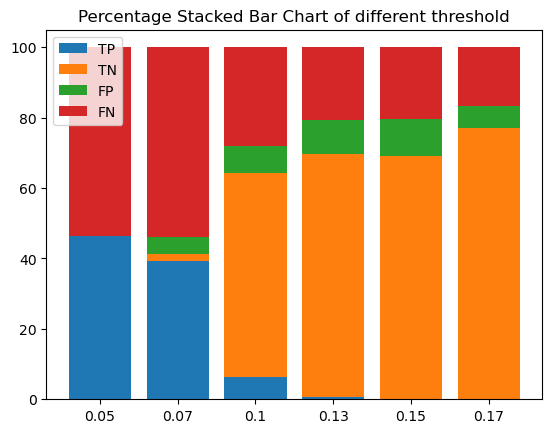

Accuracy_list
[0.05, 0.07, 0.1, 0.13, 0.15, 0.17]
[0.4627777949154111, 0.41352949051272836, 0.642243371570234, 0.6971728793355878, 0.6924755658285325, 0.7709738824747832]


In [98]:
# Plotting stacked plots threshold - Accuracy TP-TN-FP-FN Percentage stacked plots
# To plot a TP-TN-FP-FN percentage stacked plot, you can use the matplotlib library for visualisation. Here is the code to plot a percentage stacked plot (Accuracy)
import matplotlib.pyplot as plt
categories = []
for _f in idx_list:
    categories.append(str(_f))

# Calculate the percentage of data for each series
total = [sum(x) for x in zip(totTP_rec, totTN_rec, totFP_rec,totFN_rec)]
totTP_rec_percent = [x / t * 100 for x, t in zip(totTP_rec, total)]
totTN_rec_percent = [x / t * 100 for x, t in zip(totTN_rec, total)]
totFP_rec_percent = [x / t * 100 for x, t in zip(totFP_rec, total)]
totFN_rec_percent = [x / t * 100 for x, t in zip(totFN_rec, total)]

# threshold = [0.05, 0.07, 0.10, 0.13, 0.15, 0.17]
print("[TP , TN , FP , FN], num = {}".format(len(totTP_rec)))
for i in range(len(totTP_rec)):
    print("[ ",totTP_rec_percent[i],",",totTN_rec_percent[i],",",totFP_rec_percent[i],",",totFN_rec_percent[i]," ]")

# Plotting percentage stacks
Q1 = [0 for _ in range(len(totTP_rec_percent))]
Q2 = [totTP_rec_percent[i] for i in range(len(totTP_rec_percent))]
Q3 = [totTP_rec_percent[i] + totTN_rec_percent[i]  for i in range(len(totTP_rec_percent))]
Q4 = [totTP_rec_percent[i] + totTN_rec_percent[i]  + totFP_rec_percent[i] for i in range(len(totTP_rec_percent))]

plt.bar(categories, totTP_rec_percent, bottom=Q1, label='TP')
plt.bar(categories, totTN_rec_percent, bottom=Q2, label='TN')
plt.bar(categories, totFP_rec_percent, bottom=Q3, label='FP')
plt.bar(categories, totFN_rec_percent, bottom=Q4, label='FN')

# Setting the title and legend
plt.title('Percentage Stacked Bar Chart of different threshold')
plt.legend()

# Display Graphics
plt.show()

print("Accuracy_list")
print(idx_list)
print(Accuracy_list)

### Optimising similarity calculations using different families and parameters of LSH

In [99]:
# Goal Less time + higher accuracy

In [100]:
# result：Getting the best num_perm and threshold using grid search
# Time calculations must be significantly optimised，Need to use lsh prefix suffix merge optimisation
# Grid Search
permutation_parameters = [8,32,128,512,2048]
threshold_parameters = [0.03 , 0.05 , 0.07 , 0.10 , 0.13, 0.15, 0.17]

P_x = []
T_y = []
Accuracy_z = []

import math

for perm1 in permutation_parameters:
    for thr1 in threshold_parameters:
        num_perm = perm1
        threshold = float(thr1)
        print("Now threshold is {} ||| Perm number is {}".format(threshold,num_perm))
        start_t = time.time()
        lsh_segment = get_lsh_maxtrix(threshold=threshold, num_perm=128)  # Long running ......
        print("get lsh segments time ( Complexity {} * {} ): ".format(segment_leng, segment_leng), time.time() - start_t)

        totTP = totFP = totTN = totFN =0
        
        import random
        all_values = list(range(0,len(df3_4["abstract"])))
        selected_values = random.sample(all_values, 100)
        
        for idx in selected_values:
            if idx not in Idx_rec: continue
            # Create new LSH index for Accuracy plot
            lsh_context = MinHashLSH(threshold=threshold, num_perm=128)
            for i in range(0,len(df3_4["abstract"]),segment_leng):
                if i+segment_leng<len(df3_4["abstract"]):
                    end_i = i+segment_leng-1
                else:
                   end_i = len(df3_4["abstract"])-1
                if idx>=i and idx<=end_i:
                    lsh_example = MinHashLSH(threshold=threshold, num_perm=128)
                    for j in range(i,end_i+1):
                        if j in Idx_rec: lsh_example.insert(str(j),MinHash_list[j])
                    lsh_context.merge(lsh_example)
                else:
                    lsh_context.merge(lsh_segment[str(i)+"-"+str(end_i)])
            
            result = lsh_context.query(MinHash_list[idx])
            totTP += TP
            totFP += FP
            totTN += TN
            totFN += FN
            
        P_x.append(int(math.log(perm1,2)))
        T_y.append(threshold)
        Accuracy_z.append( (totTP+totTN) / (totTP+totTN+totFP+totFN) )
        
        end_time = time.time()
        print("Time for one round：", end_time-start_time)
    
print("【Cumulative time to test the confidence level of threshold , perm】 :", time.time()-start_time)


# Accuracy



Now threshold is 0.03 ||| Perm number is 8
threshold:0.03 num_perm:128 Segment interval: 0 --- 88 Size of lsh dict record:  184 bytes
get lsh segments time ( Complexity 89 * 89 ):  16.18991231918335
Time for one round： 751.7295918464661
Now threshold is 0.05 ||| Perm number is 8
threshold:0.05 num_perm:128 Segment interval: 0 --- 88 Size of lsh dict record:  184 bytes
get lsh segments time ( Complexity 89 * 89 ):  14.95915961265564
Time for one round： 859.3755106925964
Now threshold is 0.07 ||| Perm number is 8
threshold:0.07 num_perm:128 Segment interval: 0 --- 88 Size of lsh dict record:  184 bytes
get lsh segments time ( Complexity 89 * 89 ):  14.527809858322144
Time for one round： 947.12531208992
Now threshold is 0.1 ||| Perm number is 8
threshold:0.1 num_perm:128 Segment interval: 0 --- 88 Size of lsh dict record:  184 bytes
get lsh segments time ( Complexity 89 * 89 ):  32.129220724105835
Time for one round： 1391.9931976795197
Now threshold is 0.13 ||| Perm number is 8
threshold:

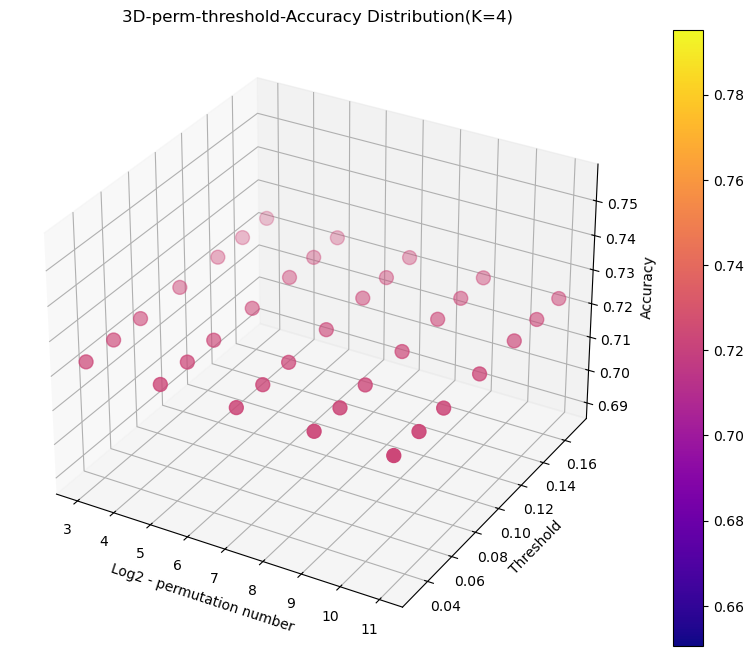

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

triplet1 = tuple(P_x)
triplet2 = tuple(T_y)
triplet3 = tuple(Accuracy_z)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection="3d")

scatter = ax.scatter(np.array(triplet1), np.array(triplet2), np.array(triplet3), c=np.array(triplet3), cmap = "plasma", s=100)
fig.colorbar(scatter)

ax.set_zlim([np.min(triplet3),np.max(triplet3)])

ax.set_xlabel("Log2 - permutation number")
ax.set_ylabel("Threshold")
ax.set_zlabel("Accuracy")
ax.set_title("3D-perm-threshold-Accuracy Distribution(K=4)")

plt.show()

## Exploring the use of word embeddings

In [102]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# documents = df3_4["abstract"].tolist()
documents = sentences
print("Number of texts：",len(documents))
# Creating a TF-IDF vectoriser
vectorizer = TfidfVectorizer()
# TF-IDF conversion of text data
tfidf_matrix = vectorizer.fit_transform(documents)

# Printable Vocabulary List
try:
    print("Vocabulary: ", vectorizer.get_feature_names(), len(vectorizer.get_feature_names()))
except AttributeError:
    print("Vocabulary: ", vectorizer.get_feature_names_out(), len(vectorizer.get_feature_names_out()))

Number of texts： 8028
Vocabulary:  ['00' '000' '0000' ... 'スパ' '温泉' '陶鲁笳'] 49228


In [103]:
# Print the TF-IDF weight matrix
print("TF-IDF Matrix: ")
print(tfidf_matrix.toarray())

TF-IDF Matrix: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Account for semantic similarity

289321272
<class 'list'>


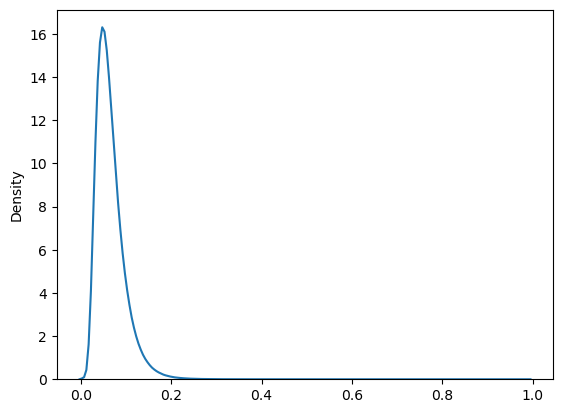

In [104]:
import numpy as np
def cos_sim(vec1,vec2):
    dot_product=np.dot(vec1,vec2)
    norm_vec1=np.linalg.norm(vec1)
    norm_vec2=np.linalg.norm(vec2)
    _sim=dot_product / (norm_vec1 * norm_vec2)
    return _sim

cos_values = []
# Tfidf_matrix = tfidf_matrix.toarray() Memory crush
for i in range(tfidf_matrix.shape[0]):
    for j in range(i+1,tfidf_matrix.shape[0]):
        cos_values.append(cos_sim(tfidf_matrix[i].toarray()[0],tfidf_matrix[j].toarray()[0]))
import sys
print(sys.getsizeof(cos_values))
print(type(cos_values))

# Plotting the distribution of values
import seaborn as sns
sns.kdeplot(cos_values)

tfidf_matrix = None
Tfidf_matrix = None
cos_values = None

In [105]:
# Similarity Analysis cancellation variable:

df3_4=Jaccard_matrix=None
sets_rec=Idx_rec=err_rec=None
sentences=shingles=vocab=None
leng_list=costT_list=K_list=None
shingles_1hot=permutation_arrs=lsh=candidate_pairs=None
pairs=MinHash_list=result=None

# Clustering Analysis

In [106]:
# Vectorization using TF-IDF
# we will be using tf-idf. This will convert our string formatted data into a measure of how important each word is to the instance out of the literature as a whole.

## Feature engineering of text

In [107]:
df3_5 = df.copy(deep=True)
nlp = spacy.load('en_core_web_sm')

# defined custom stop words list
my_stop_words = ['doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure',
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.',
    'al.', 'Elsevier', 'PMC', 'CZI', ' ', '\n', '  ', '+', ' \n', '  \n']
for stopword in my_stop_words:
    nlp.vocab[stopword].is_stop = True


tqdm.pandas()
df3_5['cleaned_abstract'] = df3_5['abstract'].progress_apply(clean_text)
df3_5['processed_abstract'] = df3_5['cleaned_abstract'].progress_apply(spacy_process_text)

df3_5['cleaned_text'] = df3_5['body_text'].progress_apply(clean_text)
df3_5['processed_text'] = df3_5['cleaned_text'].progress_apply(spacy_process_text)

print(df3_5[['processed_abstract']])
print(df3_5[['processed_text']])

100%|████████████████████████████████████████████████████████████████████████████| 8028/8028 [1:43:29<00:00,  1.29it/s]

                                     processed_abstract
0     coronavirus disease cause severe acute respira...
1     severe acute respiratory syndrome coronavirus ...
2     background major limitation invasive surfactan...
3     objective identify impact covid endourology su...
4     concept specialized membrane microdomain mm re...
...                                                 ...
9016  systematically analyze chemical constituent ci...
9017  selfproduced matrix biofilm consist extracellu...
9018  outbreak coronavirus disease medical staff fac...
9019                                                   
9021  background symptom sign covid coronavirus dise...

[8028 rows x 1 columns]
                                         processed_text
0     systemic inflammation hallmark coronavirus dis...
1     severe acute respiratory syndrome coronavirus ...
2     respiratory distress syndrome rds affect prete...
3     world health organization announce novel coron...
4     concept specializ

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):

    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X


text = df3_5['processed_text'].values
max_features = 2**12

X = vectorize(text, max_features)
print(X) #Each line represents a word in a document and its TF-IDF value
#formatted as (document index, word index) TF-IDF value.

  (0, 3979)	0.014160575878257765
  (0, 3969)	0.011869293784545674
  (0, 1701)	0.022569221819081893
  (0, 1033)	0.010244303978600983
  (0, 2544)	0.007871740716285224
  (0, 1314)	0.0156648247005586
  (0, 1935)	0.0159286333139569
  (0, 2230)	0.03472480530047952
  (0, 2663)	0.019054520057571165
  (0, 1775)	0.01343828326148709
  (0, 2098)	0.09698849299525597
  (0, 2117)	0.010670704652462447
  (0, 2957)	0.006465267822777278
  (0, 3459)	0.01047581926923592
  (0, 2604)	0.0128916293028712
  (0, 848)	0.040863190571615284
  (0, 220)	0.010304617477131078
  (0, 2148)	0.008913698319234607
  (0, 1491)	0.016498885193295423
  (0, 2261)	0.011036621143567661
  (0, 3159)	0.019877844790688107
  (0, 1071)	0.01042215743492095
  (0, 64)	0.01708315625086694
  (0, 2714)	0.05115980362864153
  (0, 650)	0.09275976232189126
  :	:
  (8027, 1823)	0.019551003661028007
  (8027, 1015)	0.0032283688859119646
  (8027, 1117)	0.05112501515401773
  (8027, 3601)	0.01374666312907454
  (8027, 2679)	0.24744693182058727
  (8027, 1

In [109]:
abstract = df3_5['processed_abstract'].values

Y = vectorize(abstract, max_features)
print(Y)
print(Y.shape)

  (0, 78)	0.11940228341105559
  (0, 4024)	0.10139632322242303
  (0, 3425)	0.12516127373640012
  (0, 1133)	0.1142913273397348
  (0, 925)	0.08985314802349302
  (0, 1288)	0.09081956053246586
  (0, 396)	0.10960303722558976
  (0, 2059)	0.08795015476892476
  (0, 1566)	0.10006526421389937
  (0, 3920)	0.07221897236505298
  (0, 885)	0.13019627462419509
  (0, 3590)	0.04597335253212055
  (0, 579)	0.06891706838445696
  (0, 2182)	0.09514734432341868
  (0, 1428)	0.11610397976166453
  (0, 53)	0.08673267881270658
  (0, 3982)	0.07849586448439697
  (0, 1891)	0.13282184805995625
  (0, 1874)	0.18955523887875553
  (0, 2474)	0.14769858141477668
  (0, 1130)	0.07408783862051616
  (0, 2353)	0.132399915342833
  (0, 2682)	0.14808244350858535
  (0, 1023)	0.20242135247081622
  (0, 3235)	0.08281776419453848
  :	:
  (8025, 2684)	0.020432057961954037
  (8025, 1651)	0.06542339883349857
  (8025, 3590)	0.03409783369534975
  (8025, 2182)	0.03528476981341939
  (8025, 1130)	0.054949979955567656
  (8025, 810)	0.053761404384

## Topic clustering: KMeans Algorithm

In [110]:
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

# PCA
pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())


# KMeans clustering
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_lables_text = kmeans.fit_predict(X_reduced)
df3_5['kmeans_cluster_text'] = kmeans_lables_text
df3_5.head()

paper_id                            doi  \
0  0015cecc2298c3bdb9bda0e0b84b38ebdcca716f     10.1007/s40744-022-00425-0   
1  0016a5c32e9cea6002cf6f352ecdb5231c7e3194  10.30699/ijp.2020.127312.2387   
2  0020e5c796f50e927b96ff0b7ea375b4745261a3     10.1186/s12887-020-02112-x   
3  00234390dbc45e3370ac8f80cbd93cec3777ca92     10.1016/j.ajur.2021.03.006   
4  0025fd87cfaf7953079b618771218b8de6893928      10.3389/fcell.2021.748905   

                                            abstract  \
0  Coronavirus disease 2019 caused by the severe ...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Background: One major limitation for less inva...   
3  Objective: To identify the impact of COVID-19 ...   
4  The concept of specialized "membrane microdoma...   

                                           body_text  \
0  Systemic inflammation is the hallmark of coron...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Respiratory Distress Syndrome (RDS) affects 85...   
3  The World Health Organization (WHO) has announ...   
4  The concept of specialized "membrane microdoma...   

                                             authors  \
0   Drosos, Alexandros A..  Pelechas,<br>Elefther...   
1   Abdollahi, Alireza.  shakoori, Abbas. <br>Kho...   
2   Chevallier, Marie.  Durrmeyer, Xavier.  Ego,<...   
3   Raheem Ali, Abdel.  Ghazwani, Yahya.  Alowida...   
4   Garofalo, Tina.  Misasi, Roberta.  Preta,<br>...   

                                               title              journal  \
0   Colchicine Against SARS-CoV-2 Infection:<br>W...       Rheumatol Ther   
1   Comparison of Patient-collected and Lab<br>Te...        Iran J Pathol   
2   Propofol versus placebo (with rescue with<br>...          BMC Pediatr   
3   Impact of COVID-19 on endourology surgical<br...         Asian J Urol   
4   Editorial: Targeting Lipid Rafts as a Strateg...  Front Cell Dev Biol   

                                    abstract_summary publish_time language  \
0   Coronavirus disease 2019 caused by the severe...   2006-01-10       en   
1                                      Not provided.   2007-06-06       en   
2   Background: One major limitation for less<br>...   2008-08-20       en   
3   Objective: To identify the impact of COVID-19...   2009-07-01       en   
4                                      Not provided.   2010-02-05       en   

                                    cleaned_abstract  \
0  Coronavirus disease  caused by the severe acut...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Background One major limitation for less invas...   
3  Objective To identify the impact of COVID on e...   
4  The concept of specialized membrane microdomai...   

                                  processed_abstract  \
0  coronavirus disease cause severe acute respira...   
1  severe acute respiratory syndrome coronavirus ...   
2  background major limitation invasive surfactan...   
3  objective identify impact covid endourology su...   
4  concept specialized membrane microdomain mm re...   

                                        cleaned_text  \
0  Systemic inflammation is the hallmark of coron...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Respiratory Distress Syndrome RDS affects  of ...   
3  The World Health Organization WHO has announce...   
4  The concept of specialized membrane microdomai...   

                                      processed_text  kmeans_cluster_text  
0  systemic inflammation hallmark coronavirus dis...                    0  
1  severe acute respiratory syndrome coronavirus ...                    1  
2  respiratory distress syndrome rds affect prete...                    5  
3  world health organization announce novel coron...                    0  
4  concept specialized membrane microdomain mm re...                    5

In [111]:
Y_reduced= pca.fit_transform(Y.toarray())

kmeans_lables_abstract = kmeans.fit_predict(Y_reduced)
df3_5['kmeans_cluster_abstract'] = kmeans_lables_abstract
df3_5.head()

paper_id                            doi  \
0  0015cecc2298c3bdb9bda0e0b84b38ebdcca716f     10.1007/s40744-022-00425-0   
1  0016a5c32e9cea6002cf6f352ecdb5231c7e3194  10.30699/ijp.2020.127312.2387   
2  0020e5c796f50e927b96ff0b7ea375b4745261a3     10.1186/s12887-020-02112-x   
3  00234390dbc45e3370ac8f80cbd93cec3777ca92     10.1016/j.ajur.2021.03.006   
4  0025fd87cfaf7953079b618771218b8de6893928      10.3389/fcell.2021.748905   

                                            abstract  \
0  Coronavirus disease 2019 caused by the severe ...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Background: One major limitation for less inva...   
3  Objective: To identify the impact of COVID-19 ...   
4  The concept of specialized "membrane microdoma...   

                                           body_text  \
0  Systemic inflammation is the hallmark of coron...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Respiratory Distress Syndrome (RDS) affects 85...   
3  The World Health Organization (WHO) has announ...   
4  The concept of specialized "membrane microdoma...   

                                             authors  \
0   Drosos, Alexandros A..  Pelechas,<br>Elefther...   
1   Abdollahi, Alireza.  shakoori, Abbas. <br>Kho...   
2   Chevallier, Marie.  Durrmeyer, Xavier.  Ego,<...   
3   Raheem Ali, Abdel.  Ghazwani, Yahya.  Alowida...   
4   Garofalo, Tina.  Misasi, Roberta.  Preta,<br>...   

                                               title              journal  \
0   Colchicine Against SARS-CoV-2 Infection:<br>W...       Rheumatol Ther   
1   Comparison of Patient-collected and Lab<br>Te...        Iran J Pathol   
2   Propofol versus placebo (with rescue with<br>...          BMC Pediatr   
3   Impact of COVID-19 on endourology surgical<br...         Asian J Urol   
4   Editorial: Targeting Lipid Rafts as a Strateg...  Front Cell Dev Biol   

                                    abstract_summary publish_time language  \
0   Coronavirus disease 2019 caused by the severe...   2006-01-10       en   
1                                      Not provided.   2007-06-06       en   
2   Background: One major limitation for less<br>...   2008-08-20       en   
3   Objective: To identify the impact of COVID-19...   2009-07-01       en   
4                                      Not provided.   2010-02-05       en   

                                    cleaned_abstract  \
0  Coronavirus disease  caused by the severe acut...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Background One major limitation for less invas...   
3  Objective To identify the impact of COVID on e...   
4  The concept of specialized membrane microdomai...   

                                  processed_abstract  \
0  coronavirus disease cause severe acute respira...   
1  severe acute respiratory syndrome coronavirus ...   
2  background major limitation invasive surfactan...   
3  objective identify impact covid endourology su...   
4  concept specialized membrane microdomain mm re...   

                                        cleaned_text  \
0  Systemic inflammation is the hallmark of coron...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Respiratory Distress Syndrome RDS affects  of ...   
3  The World Health Organization WHO has announce...   
4  The concept of specialized membrane microdomai...   

                                      processed_text  kmeans_cluster_text  \
0  systemic inflammation hallmark coronavirus dis...                    0   
1  severe acute respiratory syndrome coronavirus ...                    1   
2  respiratory distress syndrome rds affect prete...                    5   
3  world health organization announce novel coron...                    0   
4  concept specialized membrane microdomain mm re...                    5   

   kmeans_cluster_abstract  
0                        7  
1                        7  
2                        4  
3                        9  
4   

## Topic clustering: DBSCAN Algorithm

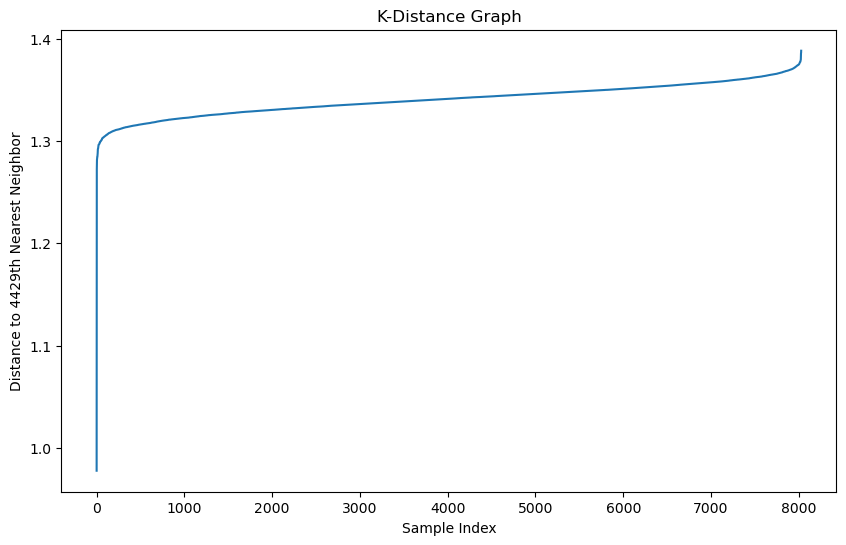

In [112]:
from sklearn.neighbors import NearestNeighbors


# Calculate the distance from each point to its 5th nearest neighbor
k1 = 4429
neighbors = NearestNeighbors(n_neighbors=k1)
neighbors_fit = neighbors.fit(X_reduced)
distances, indices = neighbors_fit.kneighbors(X_reduced)

# Sorting distances
distances = np.sort(distances[:, k1-1], axis=0)

# Plotting the K-distance
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel("Sample Index")
plt.ylabel(f"Distance to {k1}th Nearest Neighbor")
plt.title("K-Distance Graph")
plt.show()

In [113]:
from sklearn.cluster import DBSCAN
# Applying DBSCAN Clustering
dbscan_text = DBSCAN(eps=1.36, min_samples=2216)
dbscan_labels_text = dbscan_text.fit_predict(X_reduced)
df3_5['dbscan_cluster_text'] = dbscan_labels_text
df3_5.head()

paper_id                            doi  \
0  0015cecc2298c3bdb9bda0e0b84b38ebdcca716f     10.1007/s40744-022-00425-0   
1  0016a5c32e9cea6002cf6f352ecdb5231c7e3194  10.30699/ijp.2020.127312.2387   
2  0020e5c796f50e927b96ff0b7ea375b4745261a3     10.1186/s12887-020-02112-x   
3  00234390dbc45e3370ac8f80cbd93cec3777ca92     10.1016/j.ajur.2021.03.006   
4  0025fd87cfaf7953079b618771218b8de6893928      10.3389/fcell.2021.748905   

                                            abstract  \
0  Coronavirus disease 2019 caused by the severe ...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Background: One major limitation for less inva...   
3  Objective: To identify the impact of COVID-19 ...   
4  The concept of specialized "membrane microdoma...   

                                           body_text  \
0  Systemic inflammation is the hallmark of coron...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Respiratory Distress Syndrome (RDS) affects 85...   
3  The World Health Organization (WHO) has announ...   
4  The concept of specialized "membrane microdoma...   

                                             authors  \
0   Drosos, Alexandros A..  Pelechas,<br>Elefther...   
1   Abdollahi, Alireza.  shakoori, Abbas. <br>Kho...   
2   Chevallier, Marie.  Durrmeyer, Xavier.  Ego,<...   
3   Raheem Ali, Abdel.  Ghazwani, Yahya.  Alowida...   
4   Garofalo, Tina.  Misasi, Roberta.  Preta,<br>...   

                                               title              journal  \
0   Colchicine Against SARS-CoV-2 Infection:<br>W...       Rheumatol Ther   
1   Comparison of Patient-collected and Lab<br>Te...        Iran J Pathol   
2   Propofol versus placebo (with rescue with<br>...          BMC Pediatr   
3   Impact of COVID-19 on endourology surgical<br...         Asian J Urol   
4   Editorial: Targeting Lipid Rafts as a Strateg...  Front Cell Dev Biol   

                                    abstract_summary publish_time language  \
0   Coronavirus disease 2019 caused by the severe...   2006-01-10       en   
1                                      Not provided.   2007-06-06       en   
2   Background: One major limitation for less<br>...   2008-08-20       en   
3   Objective: To identify the impact of COVID-19...   2009-07-01       en   
4                                      Not provided.   2010-02-05       en   

                                    cleaned_abstract  \
0  Coronavirus disease  caused by the severe acut...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Background One major limitation for less invas...   
3  Objective To identify the impact of COVID on e...   
4  The concept of specialized membrane microdomai...   

                                  processed_abstract  \
0  coronavirus disease cause severe acute respira...   
1  severe acute respiratory syndrome coronavirus ...   
2  background major limitation invasive surfactan...   
3  objective identify impact covid endourology su...   
4  concept specialized membrane microdomain mm re...   

                                        cleaned_text  \
0  Systemic inflammation is the hallmark of coron...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Respiratory Distress Syndrome RDS affects  of ...   
3  The World Health Organization WHO has announce...   
4  The concept of specialized membrane microdomai...   

                                      processed_text  kmeans_cluster_text  \
0  systemic inflammation hallmark coronavirus dis...                    0   
1  severe acute respiratory syndrome coronavirus ...                    1   
2  respiratory distress syndrome rds affect prete...                    5   
3  world health organization announce novel coron...                    0   
4  concept specialized membrane microdomain mm re...                    5   

   kmeans_cluster_abstract  dbscan_cluster_text  
0                        7                    0  
1                        7                    0  

In [114]:
from sklearn.cluster import AgglomerativeClustering
# Apply hierarchical clustering
agglo = AgglomerativeClustering(n_clusters=10)
agglo_labels_text = agglo.fit_predict(X_reduced)
df3_5['agglo_cluster_text'] = agglo_labels_text
df3_5.head()

paper_id                            doi  \
0  0015cecc2298c3bdb9bda0e0b84b38ebdcca716f     10.1007/s40744-022-00425-0   
1  0016a5c32e9cea6002cf6f352ecdb5231c7e3194  10.30699/ijp.2020.127312.2387   
2  0020e5c796f50e927b96ff0b7ea375b4745261a3     10.1186/s12887-020-02112-x   
3  00234390dbc45e3370ac8f80cbd93cec3777ca92     10.1016/j.ajur.2021.03.006   
4  0025fd87cfaf7953079b618771218b8de6893928      10.3389/fcell.2021.748905   

                                            abstract  \
0  Coronavirus disease 2019 caused by the severe ...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Background: One major limitation for less inva...   
3  Objective: To identify the impact of COVID-19 ...   
4  The concept of specialized "membrane microdoma...   

                                           body_text  \
0  Systemic inflammation is the hallmark of coron...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Respiratory Distress Syndrome (RDS) affects 85...   
3  The World Health Organization (WHO) has announ...   
4  The concept of specialized "membrane microdoma...   

                                             authors  \
0   Drosos, Alexandros A..  Pelechas,<br>Elefther...   
1   Abdollahi, Alireza.  shakoori, Abbas. <br>Kho...   
2   Chevallier, Marie.  Durrmeyer, Xavier.  Ego,<...   
3   Raheem Ali, Abdel.  Ghazwani, Yahya.  Alowida...   
4   Garofalo, Tina.  Misasi, Roberta.  Preta,<br>...   

                                               title              journal  \
0   Colchicine Against SARS-CoV-2 Infection:<br>W...       Rheumatol Ther   
1   Comparison of Patient-collected and Lab<br>Te...        Iran J Pathol   
2   Propofol versus placebo (with rescue with<br>...          BMC Pediatr   
3   Impact of COVID-19 on endourology surgical<br...         Asian J Urol   
4   Editorial: Targeting Lipid Rafts as a Strateg...  Front Cell Dev Biol   

                                    abstract_summary publish_time language  \
0   Coronavirus disease 2019 caused by the severe...   2006-01-10       en   
1                                      Not provided.   2007-06-06       en   
2   Background: One major limitation for less<br>...   2008-08-20       en   
3   Objective: To identify the impact of COVID-19...   2009-07-01       en   
4                                      Not provided.   2010-02-05       en   

                                    cleaned_abstract  \
0  Coronavirus disease  caused by the severe acut...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Background One major limitation for less invas...   
3  Objective To identify the impact of COVID on e...   
4  The concept of specialized membrane microdomai...   

                                  processed_abstract  \
0  coronavirus disease cause severe acute respira...   
1  severe acute respiratory syndrome coronavirus ...   
2  background major limitation invasive surfactan...   
3  objective identify impact covid endourology su...   
4  concept specialized membrane microdomain mm re...   

                                        cleaned_text  \
0  Systemic inflammation is the hallmark of coron...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Respiratory Distress Syndrome RDS affects  of ...   
3  The World Health Organization WHO has announce...   
4  The concept of specialized membrane microdomai...   

                                      processed_text  kmeans_cluster_text  \
0  systemic inflammation hallmark coronavirus dis...                    0   
1  severe acute respiratory syndrome coronavirus ...                    1   
2  respiratory distress syndrome rds affect prete...                    5   
3  world health organization announce novel coron...                    0   
4  concept specialized membrane microdomain mm re...                    5   

   kmeans_cluster_abstract  dbscan_cluster_text  agglo_cluster_text  
0                        7                    0                   3  
1        

In [115]:
agglo_labels_abstract = agglo.fit_predict(Y_reduced)
df3_5['agglo_cluster_abstract'] = agglo_labels_abstract
df3_5.head()

paper_id                            doi  \
0  0015cecc2298c3bdb9bda0e0b84b38ebdcca716f     10.1007/s40744-022-00425-0   
1  0016a5c32e9cea6002cf6f352ecdb5231c7e3194  10.30699/ijp.2020.127312.2387   
2  0020e5c796f50e927b96ff0b7ea375b4745261a3     10.1186/s12887-020-02112-x   
3  00234390dbc45e3370ac8f80cbd93cec3777ca92     10.1016/j.ajur.2021.03.006   
4  0025fd87cfaf7953079b618771218b8de6893928      10.3389/fcell.2021.748905   

                                            abstract  \
0  Coronavirus disease 2019 caused by the severe ...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Background: One major limitation for less inva...   
3  Objective: To identify the impact of COVID-19 ...   
4  The concept of specialized "membrane microdoma...   

                                           body_text  \
0  Systemic inflammation is the hallmark of coron...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Respiratory Distress Syndrome (RDS) affects 85...   
3  The World Health Organization (WHO) has announ...   
4  The concept of specialized "membrane microdoma...   

                                             authors  \
0   Drosos, Alexandros A..  Pelechas,<br>Elefther...   
1   Abdollahi, Alireza.  shakoori, Abbas. <br>Kho...   
2   Chevallier, Marie.  Durrmeyer, Xavier.  Ego,<...   
3   Raheem Ali, Abdel.  Ghazwani, Yahya.  Alowida...   
4   Garofalo, Tina.  Misasi, Roberta.  Preta,<br>...   

                                               title              journal  \
0   Colchicine Against SARS-CoV-2 Infection:<br>W...       Rheumatol Ther   
1   Comparison of Patient-collected and Lab<br>Te...        Iran J Pathol   
2   Propofol versus placebo (with rescue with<br>...          BMC Pediatr   
3   Impact of COVID-19 on endourology surgical<br...         Asian J Urol   
4   Editorial: Targeting Lipid Rafts as a Strateg...  Front Cell Dev Biol   

                                    abstract_summary publish_time language  \
0   Coronavirus disease 2019 caused by the severe...   2006-01-10       en   
1                                      Not provided.   2007-06-06       en   
2   Background: One major limitation for less<br>...   2008-08-20       en   
3   Objective: To identify the impact of COVID-19...   2009-07-01       en   
4                                      Not provided.   2010-02-05       en   

                                    cleaned_abstract  \
0  Coronavirus disease  caused by the severe acut...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Background One major limitation for less invas...   
3  Objective To identify the impact of COVID on e...   
4  The concept of specialized membrane microdomai...   

                                  processed_abstract  \
0  coronavirus disease cause severe acute respira...   
1  severe acute respiratory syndrome coronavirus ...   
2  background major limitation invasive surfactan...   
3  objective identify impact covid endourology su...   
4  concept specialized membrane microdomain mm re...   

                                        cleaned_text  \
0  Systemic inflammation is the hallmark of coron...   
1  Severe acute respiratory syndrome coronavirus ...   
2  Respiratory Distress Syndrome RDS affects  of ...   
3  The World Health Organization WHO has announce...   
4  The concept of specialized membrane microdomai...   

                                      processed_text  kmeans_cluster_text  \
0  systemic inflammation hallmark coronavirus dis...                    0   
1  severe acute respiratory syndrome coronavirus ...                    1   
2  respiratory distress syndrome rds affect prete...                    5   
3  world health organization announce novel coron...                    0   
4  concept specialized membrane microdomain mm re...                    5   

   kmeans_cluster_abstract  dbscan_cluster_text  agglo_cluster_text  \
0                        7                    0                   3   
1      

## TSNE visualization

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8028 samples in 0.059s...
[t-SNE] Computed neighbors for 8028 samples in 5.207s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8028
[t-SNE] Computed conditional probabilities for sample 2000 / 8028
[t-SNE] Computed conditional probabilities for sample 3000 / 8028
[t-SNE] Computed conditional probabilities for sample 4000 / 8028
[t-SNE] Computed conditional probabilities for sample 5000 / 8028
[t-SNE] Computed conditional probabilities for sample 6000 / 8028
[t-SNE] Computed conditional probabilities for sample 7000 / 8028
[t-SNE] Computed conditional probabilities for sample 8000 / 8028
[t-SNE] Computed conditional probabilities for sample 8028 / 8028
[t-SNE] Mean sigma: 0.363550
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.771538
[t-SNE] KL divergence after 1000 iterations: 2.507288


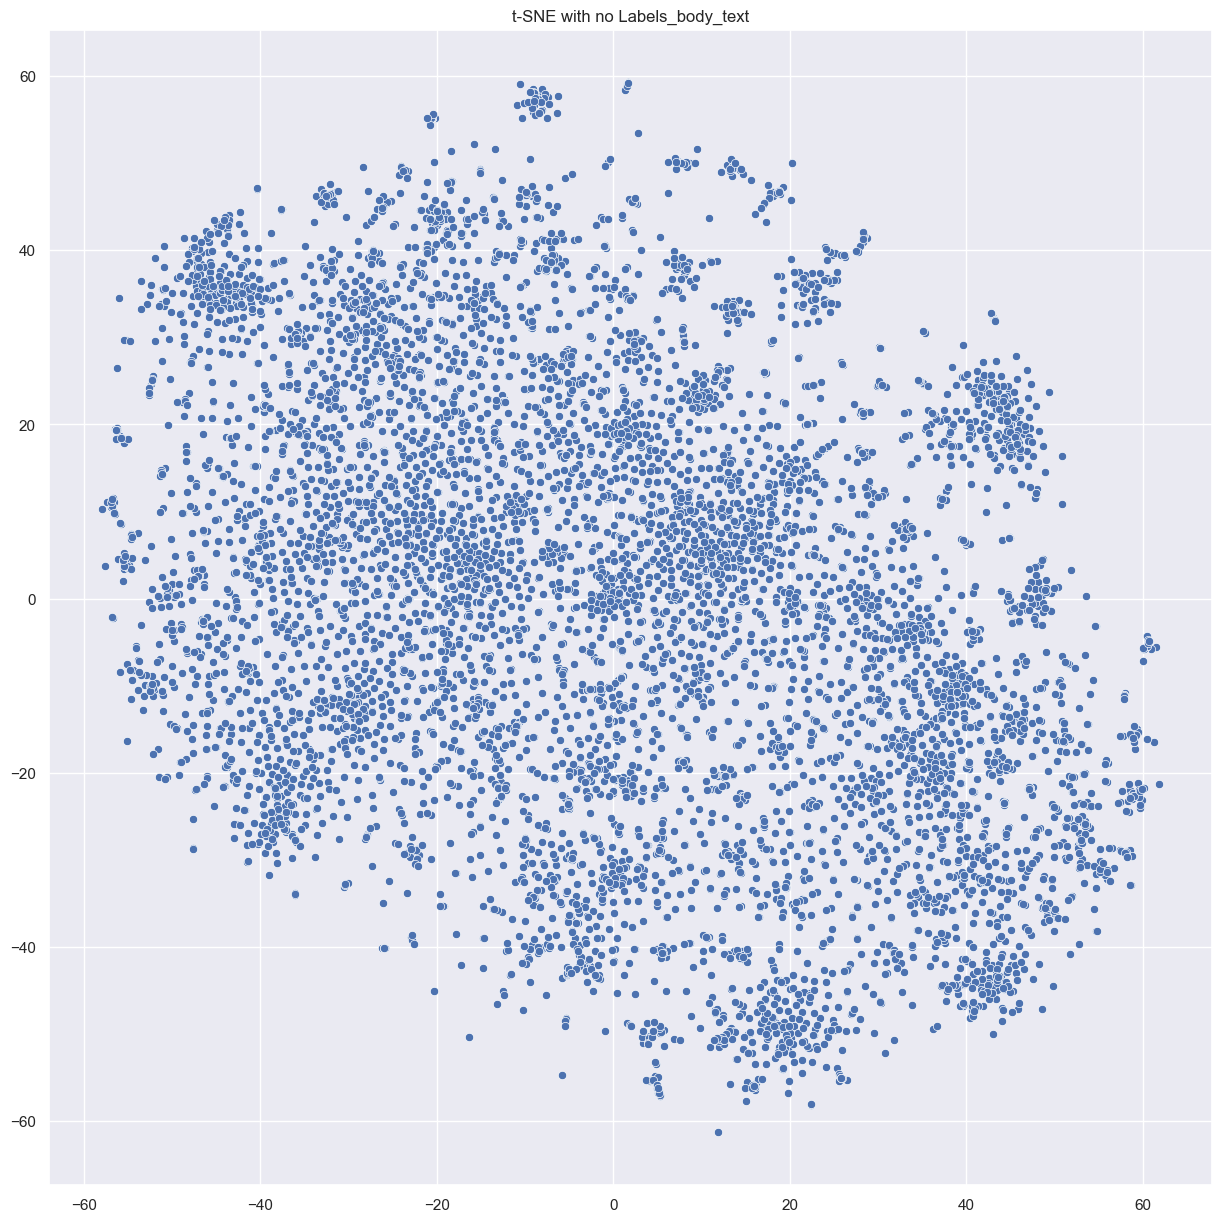

In [116]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns


tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X.toarray())


# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)

plt.title('t-SNE with no Labels_body_text')
plt.savefig("t-sne_covid19.png")
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8028 samples in 0.076s...
[t-SNE] Computed neighbors for 8028 samples in 5.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8028
[t-SNE] Computed conditional probabilities for sample 2000 / 8028
[t-SNE] Computed conditional probabilities for sample 3000 / 8028
[t-SNE] Computed conditional probabilities for sample 4000 / 8028
[t-SNE] Computed conditional probabilities for sample 5000 / 8028
[t-SNE] Computed conditional probabilities for sample 6000 / 8028
[t-SNE] Computed conditional probabilities for sample 7000 / 8028
[t-SNE] Computed conditional probabilities for sample 8000 / 8028
[t-SNE] Computed conditional probabilities for sample 8028 / 8028
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 110.818520
[t-SNE] KL divergence after 700 iterations: 3.177291


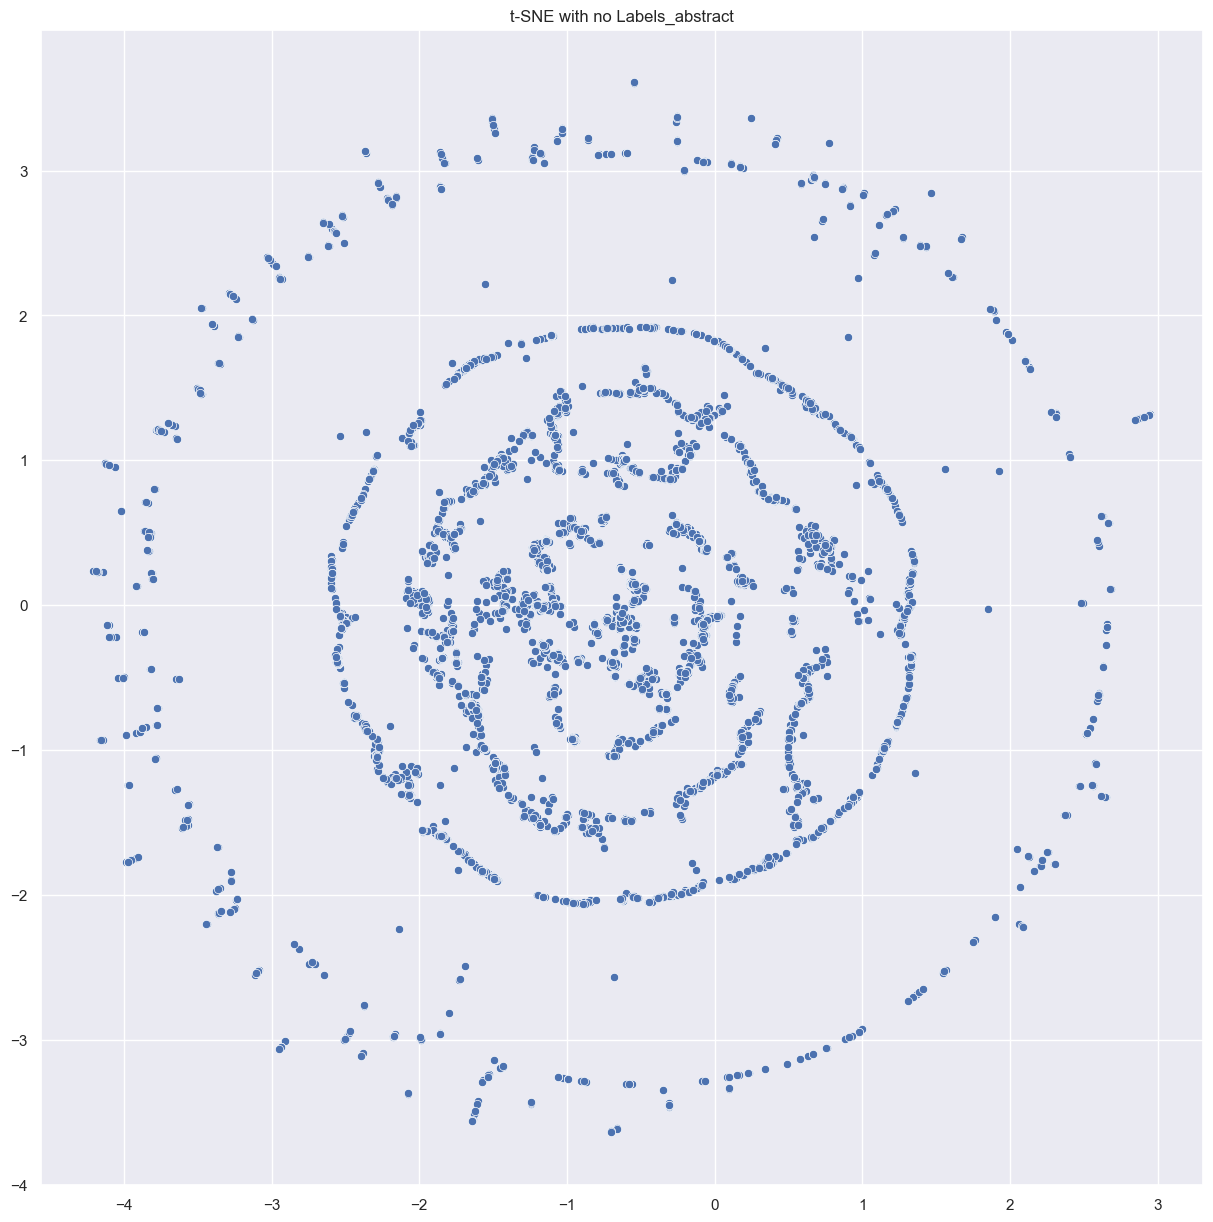

In [117]:
Y_embedded= tsne.fit_transform(Y.toarray())

sns.scatterplot(x=Y_embedded[:,0], y=Y_embedded[:,1], palette=palette)#x=Y_embedded[:, 0] 和 y=Y_embedded[:, 1] 分别指定了降维后数据的第一个和第二个主成分作为 x 轴和 y 轴
plt.title('t-SNE with no Labels_abstract')
plt.savefig("t-sne_covid19_abstract.png")
plt.show()

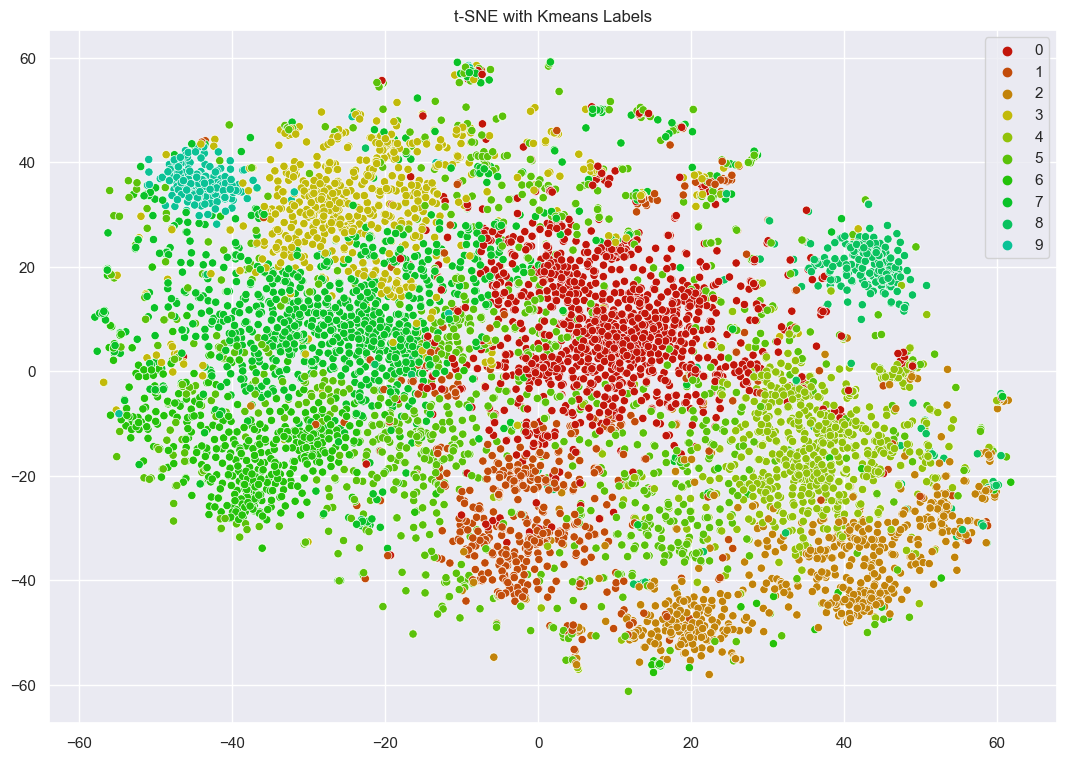

In [118]:
# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans_lables_text, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("k_means_improved_cluster_tsne.png")
plt.show()


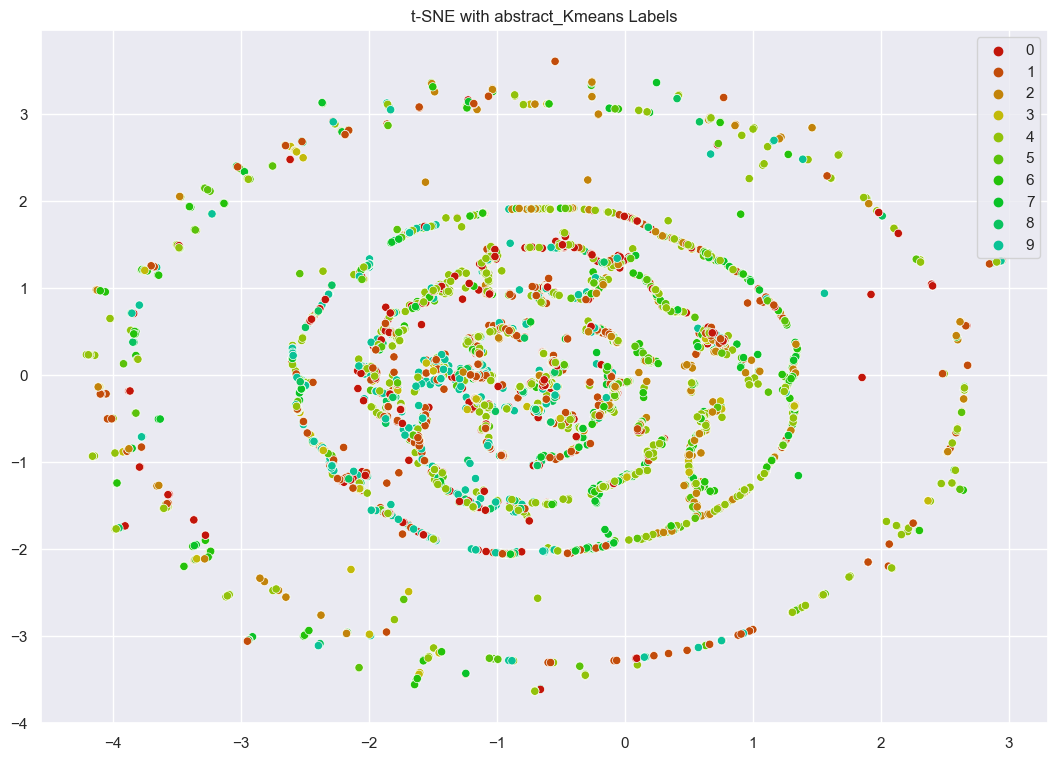

In [119]:
sns.scatterplot(x=Y_embedded[:,0], y=Y_embedded[:,1], hue=kmeans_lables_abstract, legend='full', palette=palette)
plt.title('t-SNE with abstract_Kmeans Labels')
plt.savefig("k_means_abstract_cluster_tsne.png")
plt.show()

In [120]:
from collections import Counter
k=10
for i in range(k):
    cluster_data = df3_5[df3_5['kmeans_cluster_text'] == i]['processed_text']
    all_words = ' '.join(cluster_data).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(10)  # Take the top 10 common words
    print(f"Cluster {i} common words:")
    for word, count in common_words:
        print(f" - {word}: {count}")

Cluster 0 common words:
 - patient: 63349
 - covid: 26118
 - study: 20856
 - disease: 11479
 - infection: 9689
 - case: 9609
 - treatment: 9512
 - include: 9307
 - high: 9106
 - clinical: 8948
Cluster 1 common words:
 - infection: 10027
 - virus: 9717
 - sample: 8706
 - study: 8622
 - sarscov: 8387
 - test: 8373
 - patient: 7729
 - case: 5853
 - covid: 5493
 - viral: 5327
Cluster 2 common words:
 - protein: 22588
 - virus: 13616
 - sequence: 12674
 - cell: 12016
 - s: 10853
 - sarscov: 10259
 - bind: 9235
 - c: 8822
 - viral: 8578
 - show: 8060
Cluster 3 common words:
 - study: 21746
 - participant: 13772
 - health: 13227
 - covid: 11538
 - high: 8397
 - social: 8197
 - pandemic: 7734
 - report: 7658
 - include: 7145
 - group: 7131
Cluster 4 common words:
 - cell: 54307
 - infection: 14001
 - protein: 13812
 - expression: 11976
 - study: 11722
 - virus: 10477
 - response: 10299
 - gene: 10169
 - mouse: 10049
 - patient: 10009
Cluster 5 common words:
 - study: 26537
 - high: 13321
 - in

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# TF-IDF vectorization using TfidfVectorizer
def tfidf_vectorize(text, max_features):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(text)
    return X, vectorizer

# Perform thematic analysis on each cluster
def topic_modeling_per_cluster(df, n_clusters, n_topics, max_features=2**12, n_top_words=10):
    # Get text data
    text = df3_5['processed_text'].values

    # TF-IDF vectorize all text
    X, vectorizer = tfidf_vectorize(text, max_features)

    # Create an LDA model for each cluster
    lda_models = []
    for cluster in range(n_clusters):
        cluster_text = df3_5[df3_5['kmeans_cluster_text'] == cluster]['processed_text'].values
        if len(cluster_text) > 0:
            X_cluster, _ = tfidf_vectorize(cluster_text, max_features)
            lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
            lda.fit(X_cluster)
            lda_models.append(lda)
        else:
            lda_models.append(None)

    # Print words for each topic
    for cluster, lda in enumerate(lda_models):
        if lda is not None:
            print(f"Cluster {cluster}:")
            feature_names = vectorizer.get_feature_names_out()
            for topic_idx, topic in enumerate(lda.components_):
                print(f"  Topic #{topic_idx}:")
                print("  ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        else:
            print(f"Cluster {cluster}: No data")

#Print words for each topic
n_clusters = 10  # Number of clusters
n_topics = 5  # Number of topics per cluster
max_features = 2**12  # Maximum number of features

# Calling functions for topic analysis
topic_modeling_per_cluster(df3_5, n_clusters, n_topics, max_features)

Cluster 0:
  Topic #0:
uc  referral  combine  underlie  download  kinetic  nhs  certainly  immunomodulatory  andor
  Topic #1:
refine  temporary  identical  child  icu  aggressive  node  vision  weakness  hc
  Topic #2:
peptide  cox  substitution  disease  influenza  cells  trypsin  ddimer  seasonal  glycosylation
  Topic #3:
fix  chance  hypertension  june  washing  trainee  magnetic  break  style  south
  Topic #4:
livestock  highrisk  help  financial  longterm  immediate  cleaning  hospitalize  tell  saliva
Cluster 1:
  Topic #0:
credit  peak  pedv  ha  scheme  matching  american  hub  travel  hydrogen
  Topic #1:
epitope  cholesterol  hospitalize  hot  allocation  rotavirus  envelop  hide  section  eq
  Topic #2:
ethics  cytometry  southeast  eat  fine  donor  reward  land  activity  pakistan
  Topic #3:
sc  visual  infarction  pattern  cr  sarscov  testing  subunit  cellular  respirator
  Topic #4:
hypoxia  critically  er  synthesis  bed  skin  identity  athlete  frailty  gastric


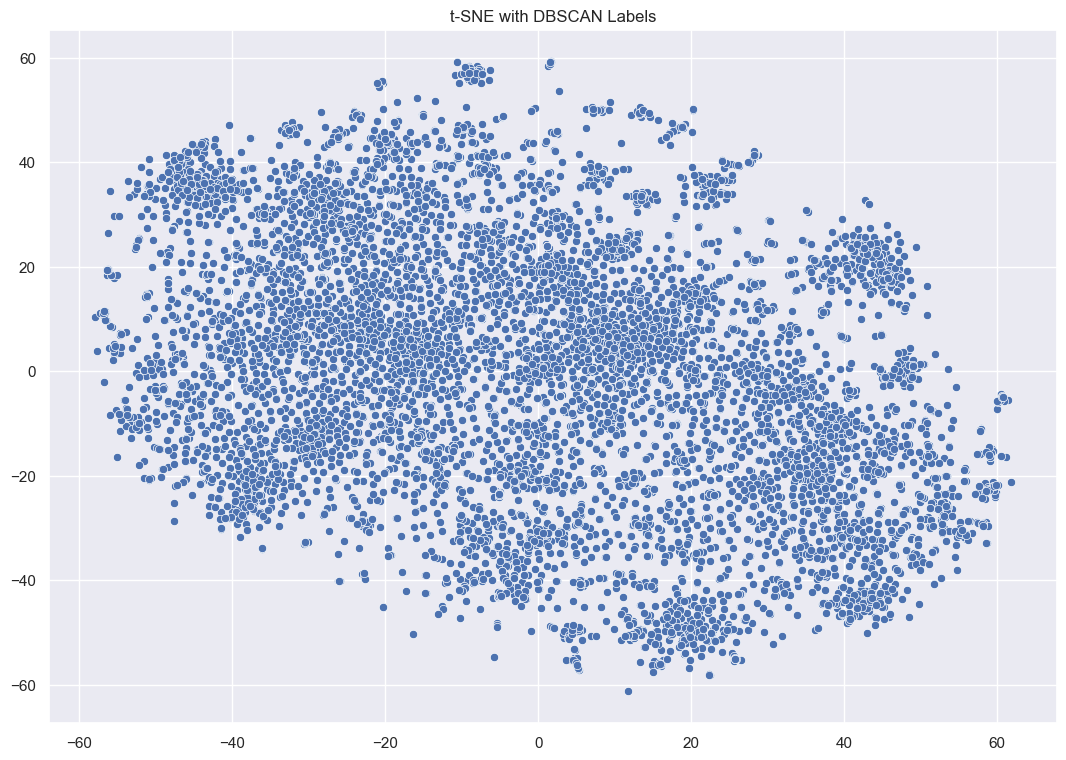

In [122]:
# plot
palette[1] = (0, 0, 0)
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], legend='full', palette=palette)
plt.title('t-SNE with DBSCAN Labels')
plt.savefig("DBSCAN_improved_cluster_tsne.png")
plt.show()


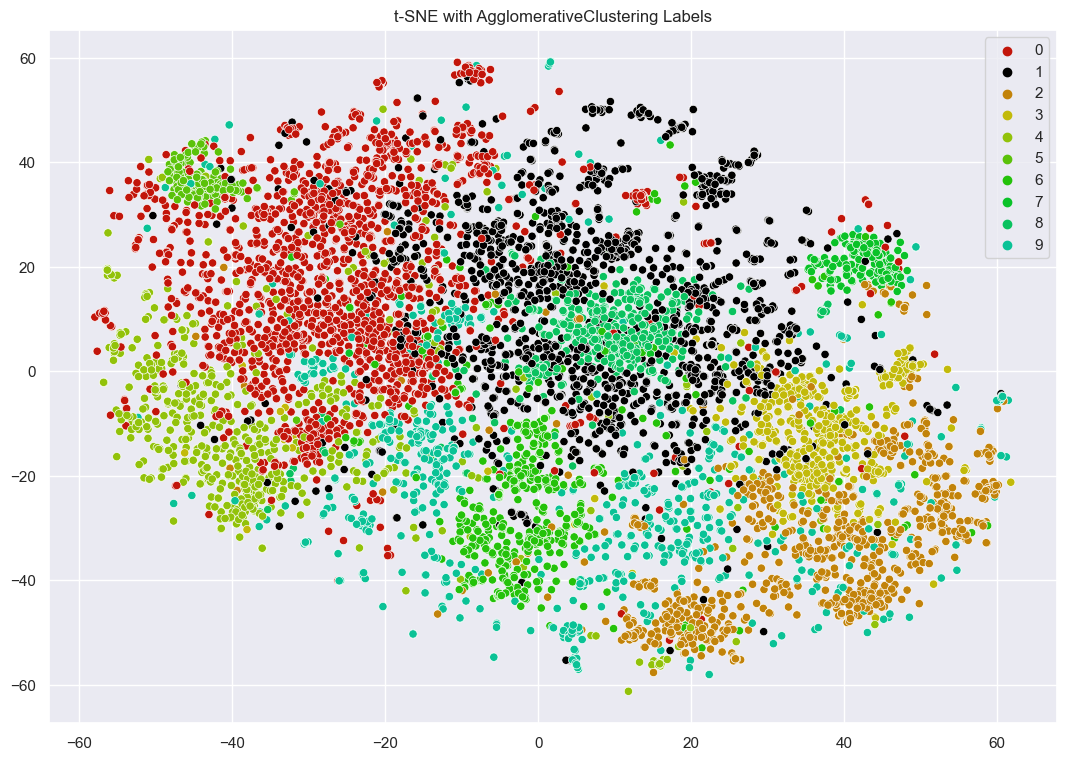

In [123]:
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=agglo_labels_text , legend='full', palette=palette)
plt.title('t-SNE with AgglomerativeClustering Labels')
plt.savefig("agglo_improved_cluster_tsne.png")
plt.show()

## Feature engineering of publish time

In [124]:
from sklearn.preprocessing import StandardScaler
from datetime import datetime
new_df= pd.DataFrame()
new_df['publish_time'] = pd.to_datetime(df3_5['publish_time'], errors='coerce')
new_df["title"] = df3_5["title"]

# Extract year, month, and day features
new_df['year'] = new_df['publish_time'].dt.year
new_df['month'] = new_df['publish_time'].dt.month
new_df['day'] = new_df['publish_time'].dt.day

print(new_df.shape)
print(new_df['year'].shape)
print(new_df['month'].shape)
print(new_df['day'].shape)
new_df.info()

# Check for NaN values
print(new_df[['year', 'month', 'day']].isna().sum())

# Drop rows with NaN values
df_cleaned = new_df.dropna(subset=['year', 'month', 'day'])

# Check if data still has NaN values
print(df_cleaned[['year', 'month', 'day']].isna().sum())
print(df_cleaned[['publish_time', 'year', 'month', 'day']].head())

# Standardize year, month, and day features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned[['year', 'month', 'day']])
scaled_features_df = pd.DataFrame(scaled_features, columns=['year_scaled', 'month_scaled', 'day_scaled'])

# ombine standardized features back to the original DataFrame
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned = pd.concat([df_cleaned, scaled_features_df], axis=1)
df_cleaned.info()


(8028, 5)
(8028,)
(8028,)
(8028,)
<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 9021
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publish_time  7971 non-null   datetime64[ns]
 1   title         8028 non-null   object        
 2   year          7971 non-null   float64       
 3   month         7971 non-null   float64       
 4   day           7971 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 634.4+ KB
year     57
month    57
day      57
dtype: int64
year     0
month    0
day      0
dtype: int64
  publish_time    year  month   day
0   2006-01-10  2006.0    1.0  10.0
1   2007-06-06  2007.0    6.0   6.0
2   2008-08-20  2008.0    8.0  20.0
3   2009-07-01  2009.0    7.0   1.0
4   2010-02-05  2010.0    2.0   5.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7971 entries, 0 to 7970
Data columns (total 8 columns):
 #   Column        Non-Nu

## Publish time clustering

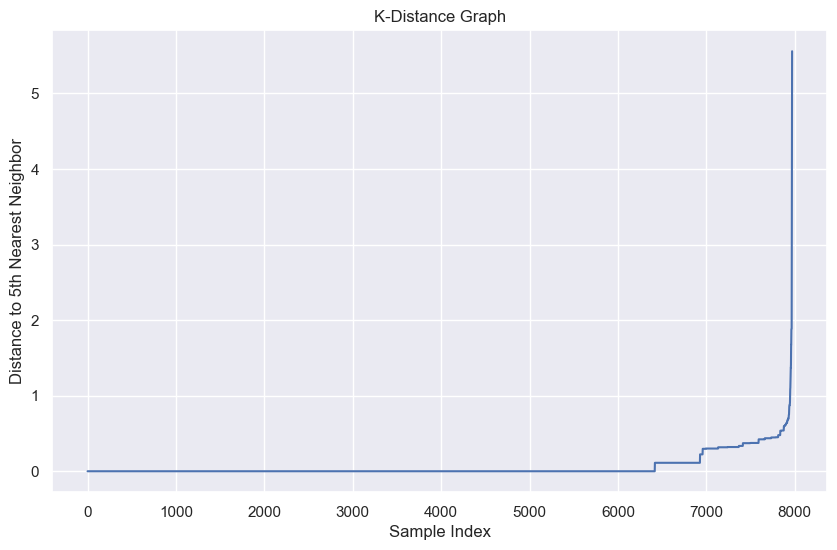

In [125]:
from sklearn.neighbors import NearestNeighbors

# Calculate the distance from each point to its 5th nearest neighbor
k2 = 5
neighbors = NearestNeighbors(n_neighbors=k2)
neighbors_fit = neighbors.fit(df_cleaned[['year_scaled', 'month_scaled', 'day_scaled']])
distances, indices = neighbors_fit.kneighbors(df_cleaned[['year_scaled', 'month_scaled', 'day_scaled']])

# Sorting distances
distances = np.sort(distances[:, k2-1], axis=0)

# Plotting the K-distance
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel("Sample Index")
plt.ylabel(f"Distance to {k2}th Nearest Neighbor")
plt.title("K-Distance Graph")
plt.show()

In [126]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=6)
df_cleaned['dbscan_cluster'] = dbscan.fit_predict(df_cleaned[['year_scaled', 'month_scaled', 'day_scaled']])
df_cleaned.info()

df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7971 entries, 0 to 7970
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   publish_time    7971 non-null   datetime64[ns]
 1   title           7971 non-null   object        
 2   year            7971 non-null   float64       
 3   month           7971 non-null   float64       
 4   day             7971 non-null   float64       
 5   year_scaled     7971 non-null   float64       
 6   month_scaled    7971 non-null   float64       
 7   day_scaled      7971 non-null   float64       
 8   dbscan_cluster  7971 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 560.6+ KB


publish_time                                              title    year  \
0   2006-01-10   Colchicine Against SARS-CoV-2 Infection:<br>W...  2006.0   
1   2007-06-06   Comparison of Patient-collected and Lab<br>Te...  2007.0   
2   2008-08-20   Propofol versus placebo (with rescue with<br>...  2008.0   
3   2009-07-01   Impact of COVID-19 on endourology surgical<br...  2009.0   
4   2010-02-05   Editorial: Targeting Lipid Rafts as a Strateg...  2010.0   

   month   day  year_scaled  month_scaled  day_scaled  dbscan_cluster  
0    1.0  10.0    -4.164432     -1.547197   -0.644768               0  
1    6.0   6.0    -3.863990     -0.062545   -1.091706               0  
2    8.0  20.0    -3.563547      0.531316    0.472576               0  
3    7.0   1.0    -3.263105      0.234385   -1.650378               0  
4    2.0   5.0    -2.962662     -1.250266   -1.203441               0

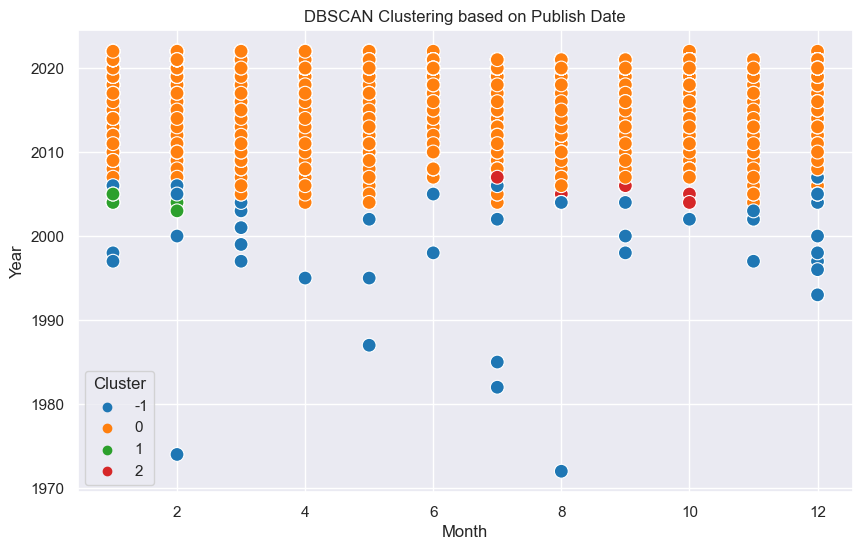

In [127]:
# visualize DBSCAN clustering result
sns.set(rc={'figure.figsize':(10, 6)})
sns.scatterplot(x='month', y='year', hue='dbscan_cluster', data=df_cleaned, palette='tab10', s=100)
plt.title('DBSCAN Clustering based on Publish Date')
plt.xlabel('Month')
plt.ylabel('Year')
plt.legend(title='Cluster')
plt.show()

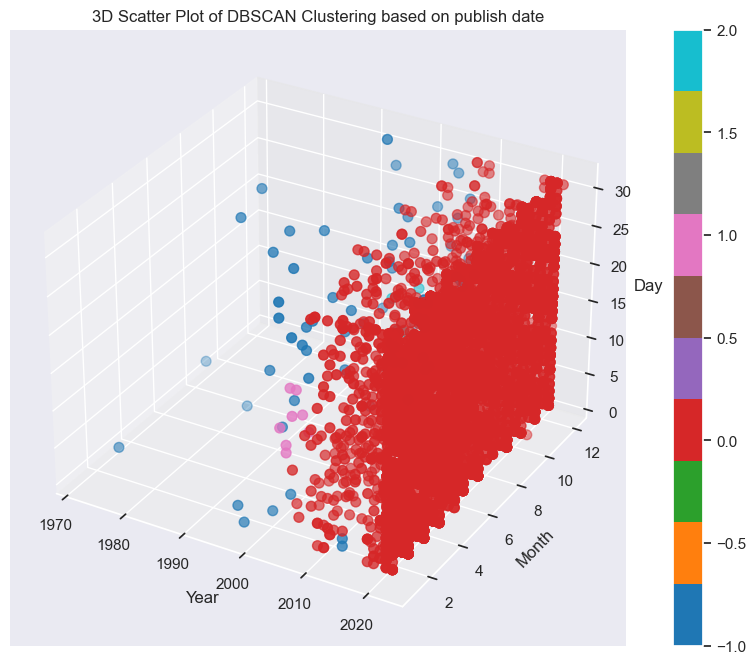

In [128]:
#3D scatter
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_cleaned['year'], df_cleaned['month'], df_cleaned['day'], c=df_cleaned['dbscan_cluster'], cmap='tab10', s=50)
plt.colorbar(sc, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_zlabel('Day')
plt.title('3D Scatter Plot of DBSCAN Clustering based on publish date')
plt.show()

In [129]:
from collections import Counter
cluster_counts = df_cleaned['dbscan_cluster'].value_counts()
print(cluster_counts)

dbscan_cluster
 0    7883
-1      63
 2      17
 1       8
Name: count, dtype: int64


In [130]:
import pandas as pd

# Create a new column 'year_month' in the format 'YYYY-MM'
df_cleaned['year_month'] = df_cleaned['year'].astype(str) + '-' + df_cleaned['month'].astype(str).str.zfill(2)

# Count the frequency of each 'year_month' occurrence
year_month_freq = df_cleaned['year_month'].value_counts().sort_index()
print(year_month_freq)

year_month
1972.0-8.0      1
1974.0-2.0      1
1982.0-7.0      1
1985.0-7.0      1
1987.0-5.0      1
             ... 
2022.0-2.0    236
2022.0-3.0    301
2022.0-4.0    238
2022.0-5.0    201
2022.0-6.0      1
Name: count, Length: 248, dtype: int64


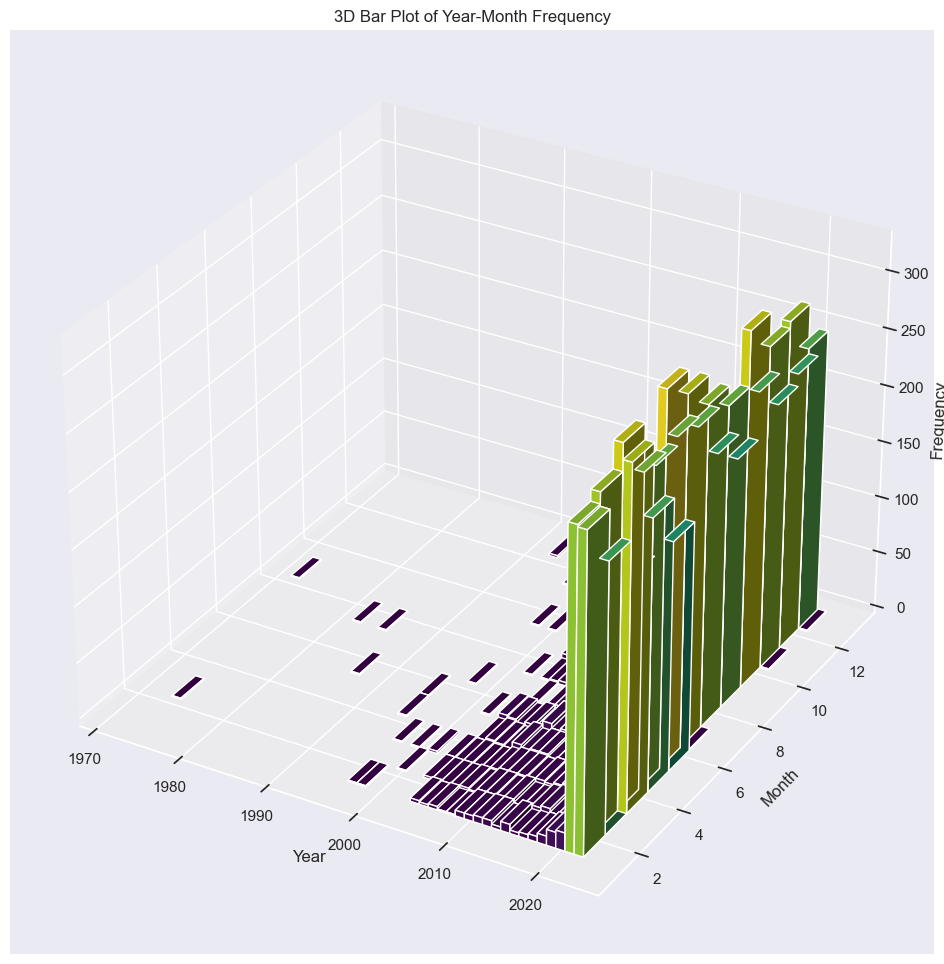

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Ensure that the year_month column is of string type
df_cleaned['year_month'] = df_cleaned['year_month'].astype(str)

# Handling Floating Point Numbers in the year_month Column
df_cleaned['year'] = df_cleaned['year_month'].apply(lambda x: int(float(x.split('-')[0])))
df_cleaned['month'] = df_cleaned['year_month'].apply(lambda x: int(float(x.split('-')[1])))

# Count the frequency of each (year, month)
freq_table = df_cleaned.groupby(['year', 'month']).size().reset_index(name='frequency')

# Creating 3D charts
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Extract data
x = freq_table['year']
y = freq_table['month']
z = freq_table['frequency']

# Generate color maps
colors = cm.viridis(z / max(z))

# Creating 3D bar charts
ax.bar3d(x, y, np.zeros(len(z)), 1, 1, z, shade=True, color=colors)

# Setting axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_zlabel('Frequency')

# Setting the title
plt.title('3D Bar Plot of Year-Month Frequency')

plt.show()

In [132]:
for cluster in df_cleaned['dbscan_cluster'].unique():
    cluster_data = df_cleaned[df_cleaned['dbscan_cluster'] == cluster]
    print(f"Cluster {cluster} Titles:")
    print(cluster_data)
    print(cluster_data['title'].values)
    print("\n")

Cluster 0 Titles:
     publish_time                                              title  year  \
0      2006-01-10   Colchicine Against SARS-CoV-2 Infection:<br>W...  2006   
1      2007-06-06   Comparison of Patient-collected and Lab<br>Te...  2007   
2      2008-08-20   Propofol versus placebo (with rescue with<br>...  2008   
3      2009-07-01   Impact of COVID-19 on endourology surgical<br...  2009   
4      2010-02-05   Editorial: Targeting Lipid Rafts as a Strateg...  2010   
...           ...                                                ...   ...   
7966   2022-03-14   Identification of Components in Citri<br>Sarc...  2022   
7967   2020-08-12   Low Concentrations of Chlorhexidine Inhibit<b...  2020   
7968   2020-04-20   Impact of the Family Environment on the<br>Em...  2020   
7969   2020-04-29   Rational Design of Live-Attenuated Vaccines<b...  2020   
7970   2021-02-05   Clinical characteristics of 10 children with ...  2021   

      month   day  year_scaled  month_scaled 

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text

# Get default English stop words and add custom stop words
default_stopwords = text.ENGLISH_STOP_WORDS
custom_stopwords = list(default_stopwords) + ['br']  # Add your customized stop words here

for cluster in df_cleaned['dbscan_cluster'].unique():
    cluster_data = df_cleaned[df_cleaned['dbscan_cluster'] == cluster]

    # Initialize TfidfVectorizer with an expanded list of deactivated words
    tfidf = TfidfVectorizer(stop_words=custom_stopwords)
    tfidf_matrix = tfidf.fit_transform(cluster_data['title'])

    # Training LDA Models
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(tfidf_matrix)

    print(f"Topics in Cluster {cluster}:")
    for idx, topic in enumerate(lda.components_):
        print(f"Topic {idx}:")
        print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")


Topics in Cluster 0:
Topic 0:
['model', 'case', 'patients', 'analysis', 'care', 'health', 'pandemic', 'based', '19', 'covid']
Topic 1:
['disease', 'coronavirus', 'virus', 'respiratory', 'infection', 'patients', 'covid', '19', 'cov', 'sars']
Topic 2:
['detection', 'diseases', 'narrative', 'method', 'pandemic', 'face', 'using', 'review', '19', 'covid']
Topic 3:
['cross', 'mental', 'social', 'patients', 'impact', 'study', 'health', 'pandemic', '19', 'covid']
Topic 4:
['management', 'review', 'based', 'medical', 'coronavirus', 'health', 'learning', 'pandemic', '19', 'covid']


Topics in Cluster -1:
Topic 0:
['partnership', 'urban', 'review', 'scientometric', 'disaster', 'resilience', 'sars', 'cov', 'related', 'research']
Topic 1:
['rehabilitation', 'associated', 'gastrointestinal', 'chest', 'ray', 'respiratory', 'study', 'diseases', '19', 'covid']
Topic 2:
['viruses', 'children', 'model', 'prediction', 'elderly', 'pneumonia', 'protein', 'syndrome', 'pediatric', 'based']
Topic 3:
['predicto

In [134]:
# Setting Hierarchical Clustering Parameters
agg_clustering = AgglomerativeClustering(n_clusters=10)

# Clustering of normalized temporal features
df_cleaned['hierarchical_cluster'] = agg_clustering.fit_predict(df_cleaned[['year_scaled', 'month_scaled', 'day_scaled']])
print(df_cleaned[['publish_time', 'hierarchical_cluster']])
df_cleaned.info()

     publish_time  hierarchical_cluster
0      2006-01-10                     2
1      2007-06-06                     2
2      2008-08-20                     2
3      2009-07-01                     2
4      2010-02-05                     0
...           ...                   ...
7966   2022-03-14                     1
7967   2020-08-12                     8
7968   2020-04-20                     5
7969   2020-04-29                     7
7970   2021-02-05                     6

[7971 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7971 entries, 0 to 7970
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   publish_time          7971 non-null   datetime64[ns]
 1   title                 7971 non-null   object        
 2   year                  7971 non-null   int64         
 3   month                 7971 non-null   int64         
 4   day                   7971 non-null

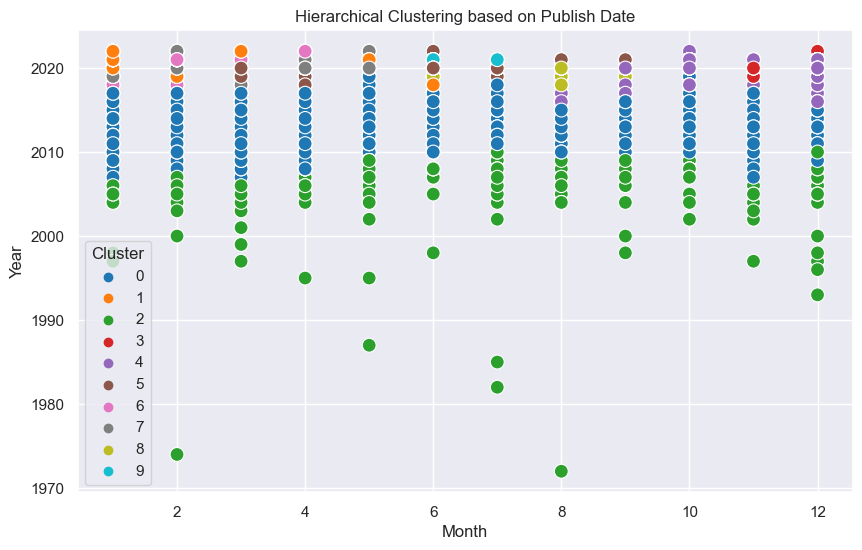

In [135]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.scatterplot(x='month', y='year', hue='hierarchical_cluster', data=df_cleaned, palette='tab10', s=100)
plt.title('Hierarchical Clustering based on Publish Date')
plt.xlabel('Month')
plt.ylabel('Year')
plt.legend(title='Cluster')
plt.show()

In [136]:
df_cleaned

publish_time                                              title  year  \
0      2006-01-10   Colchicine Against SARS-CoV-2 Infection:<br>W...  2006   
1      2007-06-06   Comparison of Patient-collected and Lab<br>Te...  2007   
2      2008-08-20   Propofol versus placebo (with rescue with<br>...  2008   
3      2009-07-01   Impact of COVID-19 on endourology surgical<br...  2009   
4      2010-02-05   Editorial: Targeting Lipid Rafts as a Strateg...  2010   
...           ...                                                ...   ...   
7966   2022-03-14   Identification of Components in Citri<br>Sarc...  2022   
7967   2020-08-12   Low Concentrations of Chlorhexidine Inhibit<b...  2020   
7968   2020-04-20   Impact of the Family Environment on the<br>Em...  2020   
7969   2020-04-29   Rational Design of Live-Attenuated Vaccines<b...  2020   
7970   2021-02-05   Clinical characteristics of 10 children with ...  2021   

      month   day  year_scaled  month_scaled  day_scaled  dbscan_cluster  \
0         1  10.0    -4.164432     -1.547197   -0.644768               0   
1         6   6.0    -3.863990     -0.062545   -1.091706               0   
2         8  20.0    -3.563547      0.531316    0.472576               0   
3         7   1.0    -3.263105      0.234385   -1.650378               0   
4         2   5.0    -2.962662     -1.250266   -1.203441               0   
...     ...   ...          ...           ...         ...             ...   
7966      3  14.0     0.642648     -0.953336   -0.197831               0   
7967      8  12.0     0.041763      0.531316   -0.421300               0   
7968      4  20.0     0.041763     -0.656406    0.472576               0   
7969      4  29.0     0.041763     -0.656406    1.478186               0   
7970      2   5.0     0.342205     -1.250266   -1.203441               0   

      year_month  hierarchical_cluster  
0     2006.0-1.0                     2  
1     2007.0-6.0                     2  
2     2008.0-8.0                     2  
3     2009.0-7.0                     2  
4     2010.0-2.0                     0  
...          ...                   ...  
7966  2022.0-3.0                     1  
7967  2020.0-8.0                     8  
7968  2020.0-4.0                     5  
7969  2020.0-4.0                     7  
7970  2021.0-2.0                     6  

[7971 rows x 11 columns]

In [137]:
# Get Cluster Centers
cluster_centers = df_cleaned[:10]
# Create a DataFrame to hold the center point
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['year_scaled', 'month_scaled', 'day_scaled'])
print(cluster_centers_df)

   year_scaled  month_scaled  day_scaled
0    -4.164432     -1.547197   -0.644768
1    -3.863990     -0.062545   -1.091706
2    -3.563547      0.531316    0.472576
3    -3.263105      0.234385   -1.650378
4    -2.962662     -1.250266   -1.203441
5    -3.263105      1.422107    1.254717
6    -2.962662      0.531316   -1.426910
7    -2.962662      1.125176    0.584310
8    -2.662220     -0.953336    1.701655
9    -2.662220     -0.656406    1.478186


In [138]:
# Reducing the center point to the original scale
cluster_centers_original = scaler.inverse_transform(cluster_centers_df)
print(cluster_centers_original)
cluster_centers_original_df = pd.DataFrame(cluster_centers_original, columns=['year', 'month', 'day'])
print(cluster_centers_original_df)

[[2.006e+03 1.000e+00 1.000e+01]
 [2.007e+03 6.000e+00 6.000e+00]
 [2.008e+03 8.000e+00 2.000e+01]
 [2.009e+03 7.000e+00 1.000e+00]
 [2.010e+03 2.000e+00 5.000e+00]
 [2.009e+03 1.100e+01 2.700e+01]
 [2.010e+03 8.000e+00 3.000e+00]
 [2.010e+03 1.000e+01 2.100e+01]
 [2.011e+03 3.000e+00 3.100e+01]
 [2.011e+03 4.000e+00 2.900e+01]]
     year  month   day
0  2006.0    1.0  10.0
1  2007.0    6.0   6.0
2  2008.0    8.0  20.0
3  2009.0    7.0   1.0
4  2010.0    2.0   5.0
5  2009.0   11.0  27.0
6  2010.0    8.0   3.0
7  2010.0   10.0  21.0
8  2011.0    3.0  31.0
9  2011.0    4.0  29.0


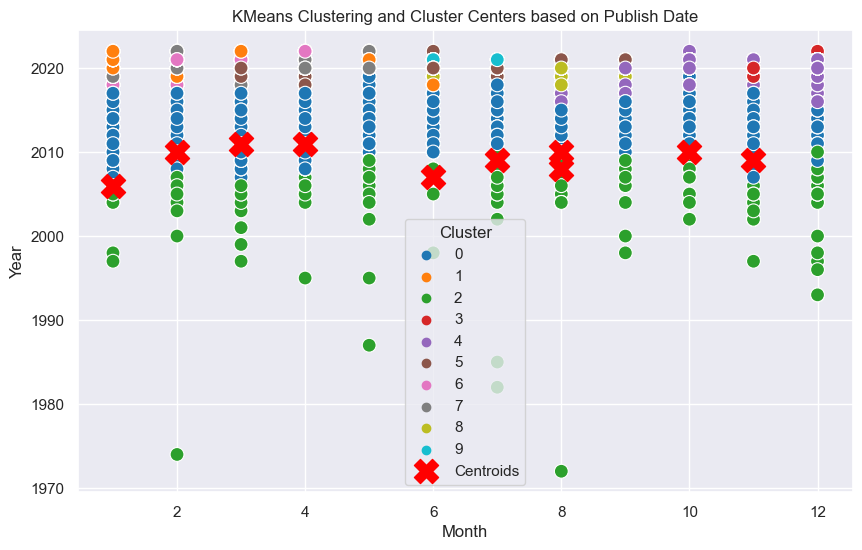

In [139]:
# Visualizing KMeans Clustering Results and Cluster Centroids
sns.set(rc={'figure.figsize':(10, 6)}) # K-means_cluster
sns.scatterplot(x='month', y='year', hue='hierarchical_cluster', data=df_cleaned, palette='tab10', s=100)
plt.scatter(cluster_centers_original_df['month'], cluster_centers_original_df['year'], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering and Cluster Centers based on Publish Date')
plt.xlabel('Month')
plt.ylabel('Year')
plt.legend(title='Cluster')
plt.show()

In [140]:
# Counting the amount of data per cluster
#cluster_counts = df_cleaned['K-means_cluster'].value_counts()
#print(cluster_counts)
print("K_means_cluster")
print("0    1198")
print("7    1196")
print("3    1137")
print("5    1016")
print("1     964")
print("9     882")
print("8     876")
print("4     293")
print("6     266")
print("2     139")
print("Name: count, dtype: int64")

K_means_cluster
0    1198
7    1196
3    1137
5    1016
1     964
9     882
8     876
4     293
6     266
2     139
Name: count, dtype: int64


# End

In [141]:
import time
print("Time usage",time.time()-STARTTIME)

Time usage 76641.4202246666
